# Programming for Data Analysis Project 2020
***

## Problem Statement

- Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.

- Investigate the types of variables involved, their likely distributions, and their relationships with each other.

- Synthesise/simulate a data set as closely matching their properties as possible.

- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
***

## Table of Contents

* [Python Libaries](#libs)

* [Road Collisions on Irish Roads](#overview)

* [Distribution by Month](#month)
     * [% Breakdown by Month of Collisions from Research Data](%month)
     * [Breakdown by Monthly Totals from Research Data](#month)
     * [Identifying *p* values for distribution by month](#monthp)
     * [Breakdown by Monthly Totals from Simulated Data](#monthsim)
     * [Comparison of Actual v Simulate Data by Month](#monthsimcomp)
     

* [Function to return *size* length of each month to form part of out main dataset](#func)


* [Distribution by Day](#daydist)
     * [% Breakdown by Day of Collisions from Research Data](#%day)
     * [Totals by Day of Collisions from Research Data](#totalday)
     * [Identifying p values for day distribution](#dayp)
     * [Date Function](#datefunction)
     * [Creating Dates](#datecreate)


* [Creation of Simulated Dataset](#sim1)
     * [Adding day name and month name](#sim2)
     * [% Breakdown by day from Simulated Data](#sim3)
     * [Breakdown by day totals from Simulated Data](#sim4)
     * [Comparison of Actual v Simulate Data by Day](#sim5)
     * [Collison Type by Day Distribution](#sim6)
     * [Day and Month Comparisons with Research Data](#sim7)
     * [Gender](#sim8)
     * [Age Groups](#sim9)
     * [Time Bands](#sim10)
     * [Road User Types](#sim11)


* [Summary Plots](#p1)
     * [Collisions by Gender](#p2)
     * [Collisions by Age Group](#p3)
     * [Collisions by Day](#p4)
     * [Collisions by Time Band](#p5)
     * [Collisions by Road User](#p6)


* [Aggregations by Date](#agg1)
     * [Research data](#agg2)
     * [Summary Dataset](#agg3)
     * [Comparison Plots](#agg4)
     * [Correlations](#agg5)


* [References](#r1)
      

***

## Python Libaries <a class="anchor" id="libs"></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from collections import defaultdict


rng = np.random.default_rng()

#plot sizes
plt.rcParams['figure.figsize'] = [24, 20]

#plot style
plt.style.use('ggplot')

## Road Collisions on Irish Roads <a class="anchor" id="overview"></a>

In this notebook we aim to synthesise a dataset of road collisons in ireland for 2018. Taking actual data from the Road safety Authority we will analyse the trends in collsions for a number of different variables. These include:

* Collision Type (Fatal or Serious)
* Month
* Day
* Gender (Male or Female)
* Age Group
* Time Band
* Road User

The simulated dataset will be created by applying distribution breakdowns which are found in the actual data. Each row of the dataset will describe one collsions and all the associated data with that collsion based on the above variables.

This dataset will then be summarised by date adding in extra research data such as:

* Fixed Charged Notices
   * Speeding
   * Mobile Phone
   * Intoxicated Drivers
* Traffic Data
  * KM's driven (millions)
  * Vehicle Count
  
From this summary datset we will look to see if the are (if any) correlations between the number of collsions and the above variables.

As you will see in the notebook, we will be using various numy.random functions to apply the distribtuons to the simualted dataset. There will also be a range of comparison plots to observe how well the simulated data matches the actual data. 

Also we will look at some initial EDA on the simuated dataset looking at breakdowns by gender, days, road users etc.

***

### Distribution by Month <a class="anchor" id="month"></a>

Using the research data based on the collsions by month for 2018, we will distribute across our dataset based on % breakdown for each month. This will form the count of days in each month which will then be given a date based on further research of the collsions by weekday.

In [4]:
#import collisions by month data
by_month_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Month.csv')

In [5]:
#creating a total columns by adding all columns together
by_month_df['Total'] = by_month_df['2014'] + by_month_df['2015'] +by_month_df['2016'] +by_month_df['2017'] +by_month_df['2018']

#### List for sorting plot outputs

The below list will be used to order our plots in a specific way 

In [6]:
#ref https://stackoverflow.com/questions/24618862/how-to-change-the-order-of-factor-plot-in-seaborn
months = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']

days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

age_groups_sorted = ['0 - 5 years','6 - 9 years','10 - 14 years','15 - 17 years','18 - 20 years','21 - 24 years','25 - 34 years','35 - 44 years','45 - 54 years','55 - 64 years','65 years and over']

time_bands_sorted = ['00:00 -03:00','03:00 - 06:00','06:00 - 09:00','09:00 - 12:00','12:00 - 15:00','15:00 - 18:00','18:00 - 21:00','21:00 - 24:00']

road_user_sort = ['All Car users','Pedestrians','Pedal cyclists','Motor cyclists','Other road users']

#### % Breakdown by Month of Collisions from Research Data <a class="anchor" id="%month"></a>
 We can apply the *groupby* function to return the % breakdown of collisions by month and filter for the year 2018. This includes both Fatal and Serious as we will be distributing theses later in the notebook. 
 
There is some extra code included to produce an output in monthly order for the purposes of the output table.

In [7]:
#ref #https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#Dataframe of just 2018 Collisions grouped by Month
Monthly_2018_Collisions = by_month_df.groupby('Month')['2018'].sum()

#Total of all months
Total_2018_Collisions = sum(by_month_df.groupby('Month')['2018'].sum())

#creating % breakdown by month
Normalised_2018_Collisions = (Monthly_2018_Collisions/Total_2018_Collisions).to_frame('%').reset_index()

#applying an order by month
Normalised_2018_Collisions['Month'] = pd.Categorical(Normalised_2018_Collisions['Month'],categories=months, ordered=True)

#sorted by month
Normalised_2018_Collisions  = Normalised_2018_Collisions.sort_values(['Month'])

#### Breakdown by Monthly Totals from Research Data <a class="anchor" id="month"></a>
Again year using the *groupby* function to group by month and year we produce an output of the total count of collisions by month for 2018.

In [8]:
#Dataframe of just 2018 Collisions grouped by Month
Monthly_2018_Collisions = by_month_df.groupby('Month')['2018'].sum()

#Total of all months
Total_2018_Collisions = sum(by_month_df.groupby('Month')['2018'].sum())

#creating % breakdown by month
Total_Monthly_2018_Collisions = (Monthly_2018_Collisions).to_frame('Total').reset_index()

#applying an order by month
Total_Monthly_2018_Collisions['Month'] = pd.Categorical(Total_Monthly_2018_Collisions['Month'],categories=months, ordered=True)

#sorted by month
Total_Monthly_2018_Collisions  = Total_Monthly_2018_Collisions.sort_values(['Month'])

#### Identifying *p* values for distribution by month <a class="anchor" id="monthp"></a>

Based on the % breakdown of collisons by month for 2018, this will form our *p* values to us as a parameter in the numpy.random.choice function to produce each month length (size) for our simulated dataset. Below, we create a numpy array from the % breadown of collsions by month for 2018.

In [9]:
#p-values to be used in function to create number of dates in each month
#month_p_values = np.array(Normalised_2018_Collisions['%'])
month_p_values = np.array(Normalised_2018_Collisions['%'])
month_p_values

array([0.07484663, 0.07177914, 0.07472393, 0.07595092, 0.09042945,
       0.08858896, 0.09055215, 0.0792638 , 0.08527607, 0.08981595,
       0.09042945, 0.08834356])

#### Applying *p* values to np.random.choice function creating 8150 datapoints

The new dataset will be *8150* in length (size) as the actual collisions for 2018 was *8150*. Below we pass our *P* values and dataset size to the *numpy.random.choice* function. This in turn is passed as a parameter to form a new dataset.

In [10]:
#size of dataset 8150, 2018 had 8150 collisions so we will use this figure
dataset_size = 8150

#numpy random.choice function to distribute months p values
month_df = pd.DataFrame(rng.choice(months,dataset_size,p=(month_p_values)),columns=['Month'])


#### Breakdown by Monthly Totals from Simulated Data <a class="anchor" id="monthsim"></a>
Using the *groupby* function like before, we can produce the count by month for our simulated data.

In [11]:
#group by month 
month_df_totals = (month_df.groupby('Month')['Month'].count()).to_frame('Total').reset_index()

#sorting months in order
month_df_totals['Month'] = pd.Categorical(month_df_totals['Month'],categories=months, ordered=True)
month_df_totals = month_df_totals.sort_values(['Month'])

#### Comparison of Actual v Simulate Data by Month <a class="anchor" id="monthsimcomp"></a>

The simulated data and actual data are now compared.
We can see a comparison below in a:
 * Table
 * Barplot
 * KDE
 * Lineplot

In [12]:
#months in order
months_for_compare = month_df_totals['Month']

#simlated month counts
simulated_month = month_df_totals['Total']

#actual month counts
actual_month = Total_Monthly_2018_Collisions['Total']

# creation of data series for each of the above
sim_months = pd.Series(simulated_month,name='Simulated Data')
actual_months = pd.Series(actual_month,name='Actual Data')

#cretion of a datframe for comparison between simulated data and actual data 
month_compare_df = pd.DataFrame(months_for_compare)
month_compare_df['Simulated Data'] = sim_months
month_compare_df['Actual Data'] = actual_months

#variance column
month_compare_df['Variance'] = month_compare_df['Simulated Data']-month_compare_df['Actual Data']

#% variance
month_compare_df['% Variance to Actual'] = round(month_compare_df['Variance']/month_compare_df['Actual Data'],3)

month_compare_df

,Month,Simulated Data,Actual Data,Variance,% Variance to Actual
4,January,621,610,11,0.018
3,February,579,585,-6,-0.010
7,March,649,609,40,0.066
0,April,602,619,-17,-0.027
8,May,737,737,0,0.000
6,June,739,722,17,0.024
5,July,796,738,58,0.079
1,August,642,646,-4,-0.006
11,September,693,695,-2,-0.003
10,October,689,732,-43,-0.059


''

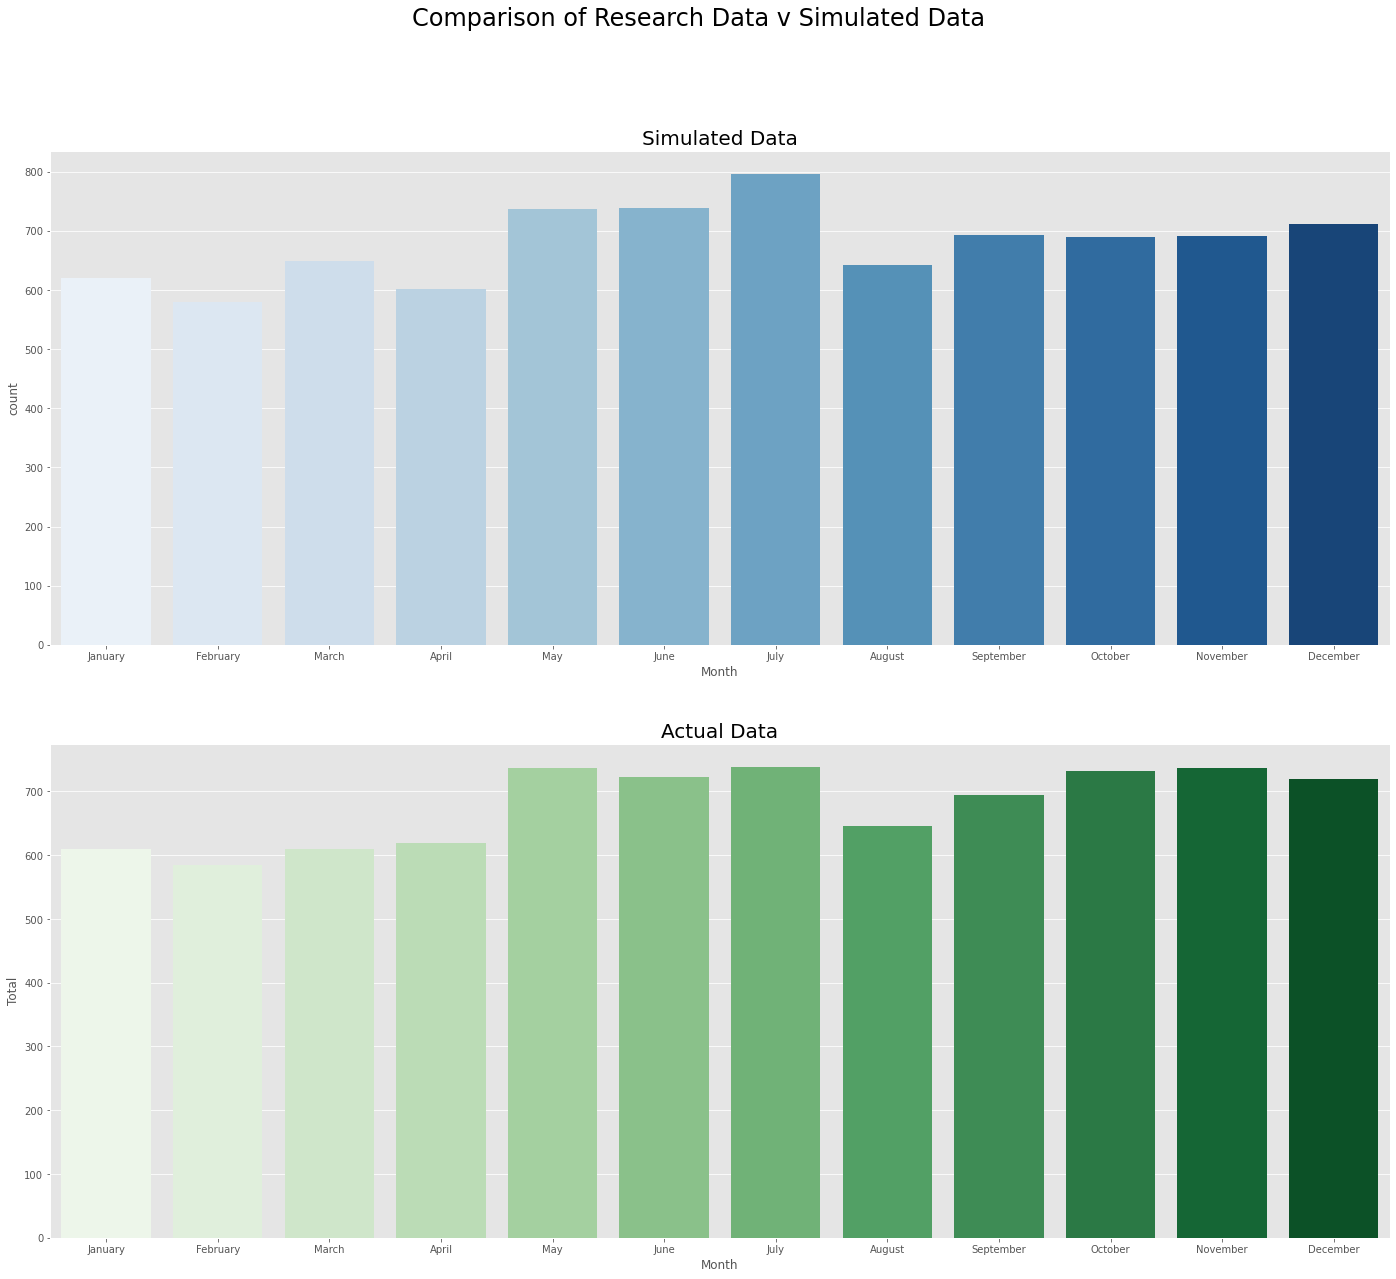

In [13]:
#subtitle
plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

#plot 1 simulated data
plt.subplot(2,1,1)
plt.title('Simulated Data',fontsize=20)
sns.countplot(x='Month',data=month_df,palette='Blues',order=months)

#plot 2 actual data
plt.subplot(2,1,2)
plt.title('Actual Data',fontsize=20)
sns.barplot(x='Month',y='Total',data=Total_Monthly_2018_Collisions,ci=None,palette='Greens')

;

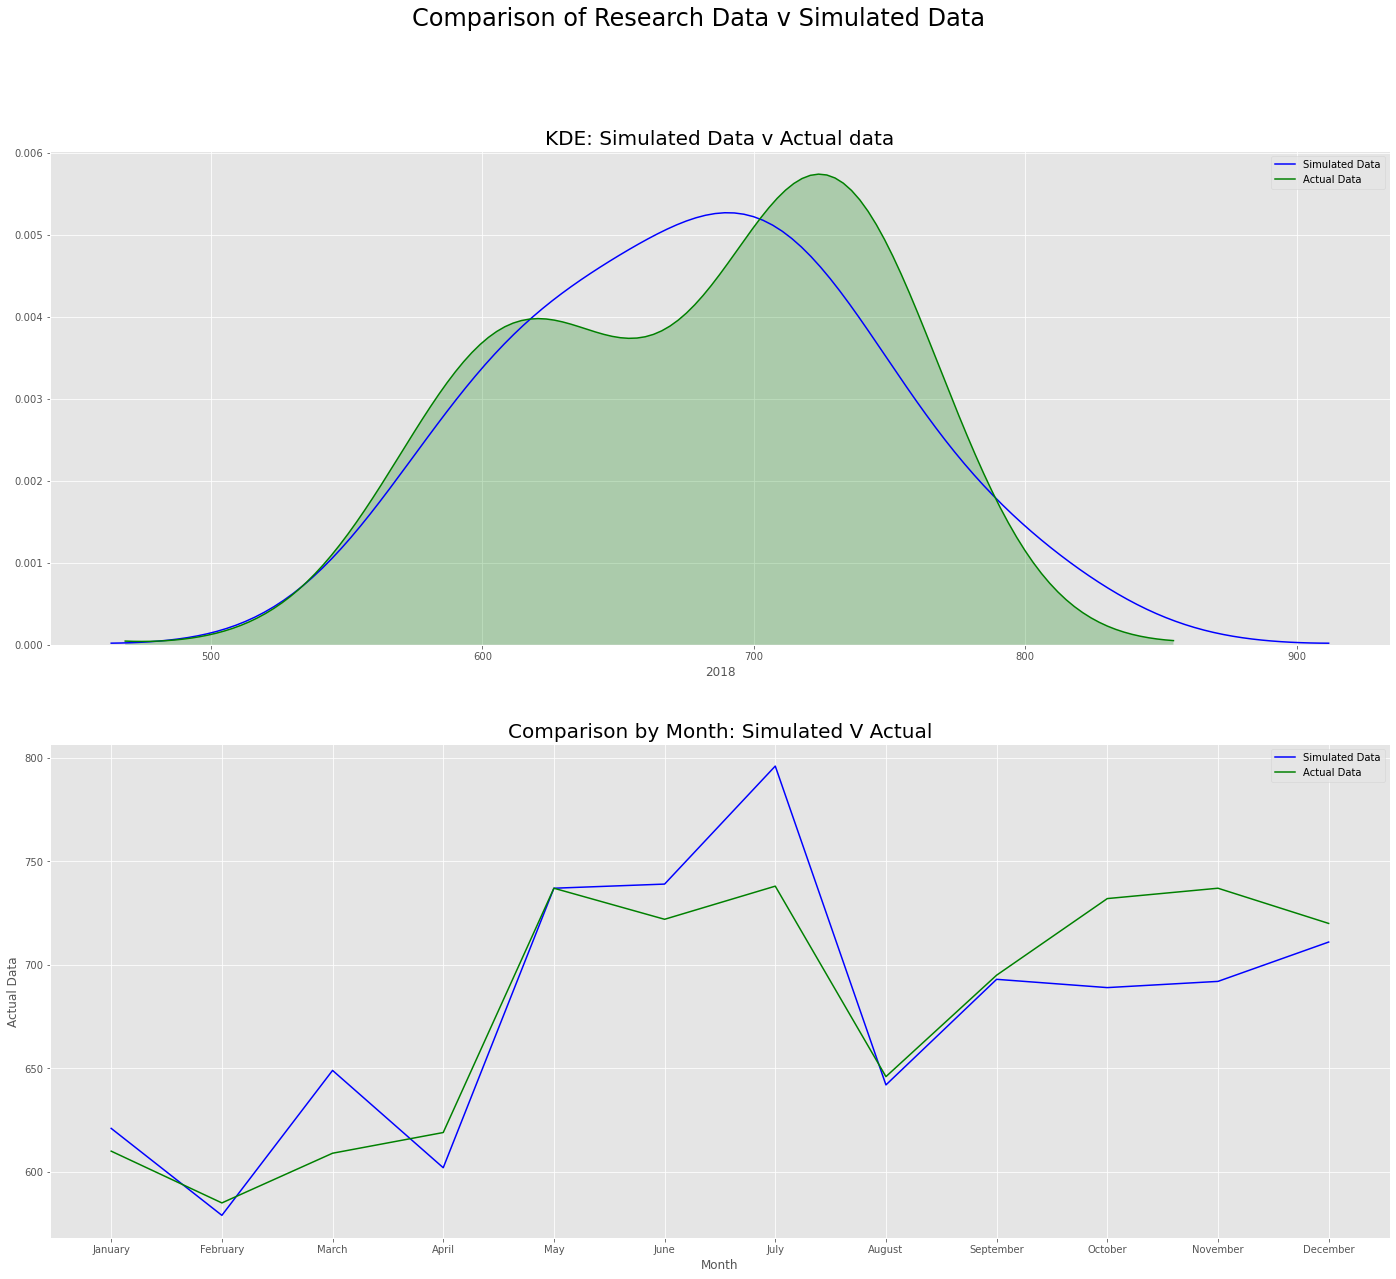

In [14]:
#subtitle
plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

#KDE simulated data V actual data
plt.subplot(2,1,1)
plt.title('KDE: Simulated Data v Actual data',fontsize=20)
sns.distplot(month_df['Month'].value_counts(),hist=False,color='Blue',label = 'Simulated Data')
sns.distplot(by_month_df.groupby('Month')['2018'].sum(),hist=False,color='Green',kde_kws={"shade": True}, label ='Actual Data')

#Line plot simulated data V actual data
plt.subplot(2,1,2)
plt.title('Comparison by Month: Simulated V Actual',fontsize=20)
sns.lineplot(x='Month',y='Simulated Data',data=month_compare_df,color='b',label='Simulated Data')
sns.lineplot(x='Month',y='Actual Data',data=month_compare_df,color='g',label='Actual Data');

We can observe from the above plots that it takes the same trends as the actual data for 2018. 
***

## Function to return *size* length of each month to form part of out main dataset <a class="anchor" id="func"></a>

The below user defined function allows us to return the size (length) for each month 

In [15]:
def size(data,col,m):
    "Function to return size of a months within a given dataframe"
    
    #length of the column values
    size = len(data[data[col]==m])
    
    #return the size
    return size

***

### Distribution by Day <a class="anchor" id="daydist"></a>

Using the research data based on the collsions by day for 2018, we will distribute across our dataset based on % breakdown for each day. This will work in another function along with the Monthly *p* values to form our main dataset.

In [16]:
#import collisions by day actual data
by_day_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Day.csv')
by_day_df

,Day,Type,2014,2015,2016,2017,2018
0,Sunday,Fatalities,30,31,37,31,31
1,Sunday,Serious,1050,1076,1044,1062,995
2,Monday,Fatalities,26,20,20,38,18
3,Monday,Serious,1248,1172,1105,1065,1137
4,Tuesday,Fatalities,18,27,29,17,22
5,Tuesday,Serious,1143,1086,1094,1084,1145
6,Wednesday,Fatalities,25,20,25,17,17
7,Wednesday,Serious,1062,1122,1113,1130,1108
8,Thursday,Fatalities,38,19,32,10,15
9,Thursday,Serious,1113,1113,1040,1156,1203


In [17]:
#create a total columns
by_day_df['Total'] = by_day_df['2014'] + by_day_df['2015'] + by_day_df['2016'] +by_day_df['2017']+by_day_df['2018']
by_day_df

,Day,Type,2014,2015,2016,2017,2018,Total
0,Sunday,Fatalities,30,31,37,31,31,160
1,Sunday,Serious,1050,1076,1044,1062,995,5227
2,Monday,Fatalities,26,20,20,38,18,122
3,Monday,Serious,1248,1172,1105,1065,1137,5727
4,Tuesday,Fatalities,18,27,29,17,22,113
5,Tuesday,Serious,1143,1086,1094,1084,1145,5552
6,Wednesday,Fatalities,25,20,25,17,17,104
7,Wednesday,Serious,1062,1122,1113,1130,1108,5535
8,Thursday,Fatalities,38,19,32,10,15,114
9,Thursday,Serious,1113,1113,1040,1156,1203,5625


#### % Breakdown by Day of Collisions from Research Data <a class="anchor" id="%day"></a>

In [18]:
#grouping collisions by day for 2018
day_collisions = by_day_df.groupby('Day')['2018'].sum()
total_day = sum(by_day_df.groupby('Day')['2018'].sum())

#getting % breakdown ordered by day
normalised_day = (day_collisions/total_day).to_frame('%').reset_index()
normalised_day['Day'] = pd.Categorical(normalised_day['Day'],categories=days, ordered=True)

normalised_day  = normalised_day.sort_values(['Day'])
normalised_day

,Day,%
1,Monday,0.141718
5,Tuesday,0.143190
6,Wednesday,0.138037
4,Thursday,0.149448
0,Friday,0.163190
2,Saturday,0.138528
3,Sunday,0.125890


#### Totals by Day of Collisions from Research Data <a class="anchor" id="totalday"></a>

In [19]:
#getting total breakdown by ordered by day
totals_day = (day_collisions).to_frame('Total').reset_index()
totals_day['Day'] = pd.Categorical(totals_day['Day'],categories=days, ordered=True)

totals_day  = totals_day.sort_values(['Day'])
totals_day

,Day,Total
1,Monday,1155
5,Tuesday,1167
6,Wednesday,1125
4,Thursday,1218
0,Friday,1330
2,Saturday,1129
3,Sunday,1026


#### Identifying *p* values for day distribution <a class="anchor" id="dayp"></a>

The % breakdown by day will be applied as *p* values to be applied to each relevant day.

In [20]:
#p-values to be used in function to create number of dates in each month
day_p_values = np.array(normalised_day['%'])
day_p_values

array([0.14171779, 0.14319018, 0.13803681, 0.14944785, 0.16319018,
       0.13852761, 0.12588957])

#### Dictionary of Day names and *p* values

A dictionary of Days and *p* values are created for the user defined date function (see below) to distribute dates according to the % breakdown.

In [21]:
#https://stackoverflow.com/questions/52207358/create-dictionary-from-two-numpy-arrays
#creating day and p value dictionary
day_p_dict= {}
for A,B in zip(days, day_p_values):
    day_p_dict[A] = B

In [22]:
#output of dictionary
day_p_dict

{'Monday': 0.14171779141104293,
 'Tuesday': 0.14319018404907977,
 'Wednesday': 0.13803680981595093,
 'Thursday': 0.1494478527607362,
 'Friday': 0.16319018404907976,
 'Saturday': 0.13852760736196318,
 'Sunday': 0.12588957055214725}

#### Date Function <a class="anchor" id="datefunction"></a>

The below functions takes each month and applies the day *p* values to create a date value to for our main dataset.

The parameters passed to the function are:

* year
* month
* date
* month length
* size of month in terms of data points

This will then apply a date for each of out 8150 data points based on month and the daily *p* values.

In [23]:
#ref https://stackoverflow.com/questions/58195789/how-to-generate-random-dates-based-on-the-probability-of-the-days-in-python
def dates(y,m,d,ml,sz):
    """Function that takes the p values by day and distributes them across a relevant month. 
    Function parameters take in year, month,day, month length and size of month from dataset size"""

    # dictionary of day and p values
    days = day_p_dict 
    
    #takes in year, month and day as start point and adds a number of days
    date_list = [(datetime.datetime(y, m, d) + datetime.timedelta(days=x)) for x in range(ml)]
    
    #default dict for date values to be appended
    d = defaultdict(list)
    
    #look through dates
    for i in date_list:
        # return date in string format d/m/y
        d[i.strftime("%A")].append(i.strftime('%d/%m/%y'))
    
    #applying p vaues from dictionary
    result = np.random.choice(list(d.values()),

# list comprehension for values by day
p=[days.get(i) for i in list(d.keys())],
                          size=sz)
    
    # applying numpy random.choice to result variable
    final = [np.random.choice(i) for i in result]
    return final

***

#### Creating Dates <a class="anchor" id="datecreate"></a>
Variables created by Month from above function distributing days according to the day *p* values.

The dates function is applied to each month. This will then be concatenated to form one dataset.

In [24]:
#applying dates function to create dates for n month below
jan_dates = dates(2018,1,1,31,size(month_df,'Month','January'))
feb_dates = dates(2018,2,1,29,size(month_df,'Month','February'))
mar_dates = dates(2018,3,1,31,size(month_df,'Month','March'))
apr_dates = dates(2018,4,1,30,size(month_df,'Month','April'))
may_dates = dates(2018,5,1,31,size(month_df,'Month','May'))
jun_dates = dates(2018,6,1,30,size(month_df,'Month','June'))
jul_dates = dates(2018,7,1,31,size(month_df,'Month','July'))
aug_dates = dates(2018,8,1,31,size(month_df,'Month','August'))
sept_dates = dates(2018,9,1,30,size(month_df,'Month','September'))
oct_dates = dates(2018,10,1,31,size(month_df,'Month','October'))
nov_dates = dates(2018,11,1,30,size(month_df,'Month','November'))
dec_dates = dates(2018,12,1,31,size(month_df,'Month','December'))

In [25]:
#concatenation of above variables
date_concat = jan_dates+feb_dates+mar_dates+apr_dates+may_dates+jun_dates+jul_dates+aug_dates+sept_dates+oct_dates+nov_dates+dec_dates

#check if sizes are equal
print("Check if both are the same size")
len(date_concat) == len(month_df['Month'])

Check if both are the same size


True

***

### Creation of  Simulated Dataset <a class="anchor" id="sim1"></a>
The first column will be the dates that were created from the month and day distributions from the research of the 2018 collision data. The date value will be converted into datetime from an object.

In [26]:
#dataset
df = pd.DataFrame(date_concat,columns=['Date'])

#converting dates generated from our function into datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

#display datatype of our date values
df.dtypes

Date    datetime64[ns]
dtype: object

***

#### Adding day name and month name <a class="anchor" id="sim2"></a>

In [27]:
#ref https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html

#day name
df['Day'] = df['Date'].dt.day_name()

#month name
df['Month'] = df['Date'].dt.month_name()

#check first 5 rows of dataset
print(df.head(5))
print(" ")
#check bottom 5 rows
print(df.tail(5))

        Date       Day    Month
0 2018-01-19    Friday  January
1 2018-01-11  Thursday  January
2 2018-01-27  Saturday  January
3 2018-01-18  Thursday  January
4 2018-01-15    Monday  January
 
           Date        Day     Month
8145 2018-12-15   Saturday  December
8146 2018-12-06   Thursday  December
8147 2018-12-07     Friday  December
8148 2018-12-10     Monday  December
8149 2018-12-19  Wednesday  December


***

#### % Breakdown by day from Simulated Data <a class="anchor" id="sim3"></a>

In [28]:
#grouping simualted data by day
df_day_collisions = df.groupby('Day')['Day'].count()

#creating a % breakdown 
df_normalised_days = (df_day_collisions/sum(df_day_collisions)).to_frame('%').reset_index()

#pdCategorical to produce an output sorted by month
df_normalised_days['Day'] = pd.Categorical(df_normalised_days['Day'],categories=days,ordered=True)

#% breakdown bt day
df_normalised_days = df_normalised_days.sort_values(['Day'])

#### Breakdown by day totals from Simulated Data <a class="anchor" id="sim4"></a>

In [29]:
#grouping simualted data by day
df_day_collisions = df.groupby('Day')['Day'].count()

#creating total by month
df_day_totals = (df_day_collisions).to_frame('Total').reset_index()

#pdCategorical to produce an output sorted by month
df_day_totals['Day'] = pd.Categorical(df_day_totals['Day'],categories=days,ordered=True)

#% breakdown bt day
df_day_totals = df_day_totals.sort_values(['Day'])

*** 

#### Comparison of Actual v Simulate Data by Day <a class="anchor" id="sim5"></a>

In [30]:
#creating a compartive table between actual and simulated data
days_for_compare = df_day_totals['Day']
simulated_day = df_day_totals['Total']
actual_day = totals_day['Total']

sim_days = pd.Series(simulated_day,name='Simulated Data')
actual_days = pd.Series(actual_day,name='Actual Data')

#adding column values
day_compare_df = pd.DataFrame(days_for_compare)
day_compare_df['Simulated Data'] = sim_days
day_compare_df['Actual Data'] = actual_days
day_compare_df['Variance'] = day_compare_df['Simulated Data']-day_compare_df['Actual Data']
day_compare_df['% Variance to Actual'] = round(day_compare_df['Variance']/day_compare_df['Actual Data'],3)
                                               
day_compare_df

,Day,Simulated Data,Actual Data,Variance,% Variance to Actual
1,Monday,1175,1155,20,0.017
5,Tuesday,1122,1167,-45,-0.039
6,Wednesday,1109,1125,-16,-0.014
4,Thursday,1226,1218,8,0.007
0,Friday,1375,1330,45,0.034
2,Saturday,1107,1129,-22,-0.019
3,Sunday,1036,1026,10,0.010


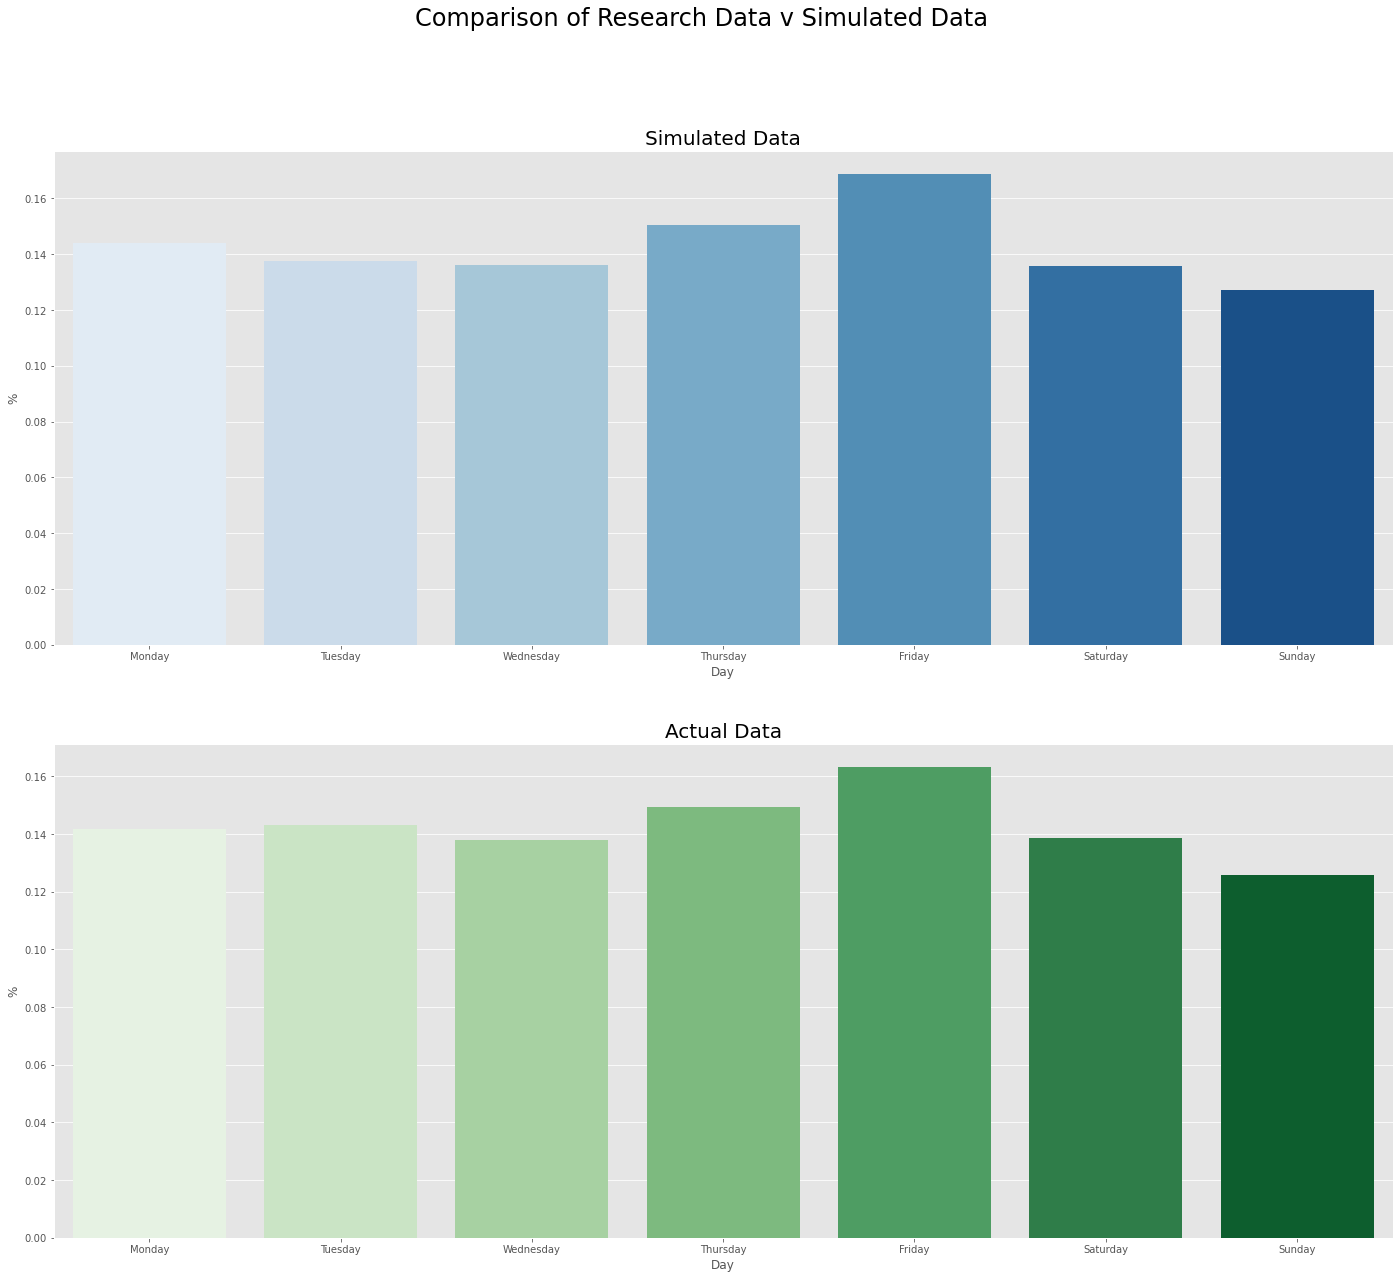

In [31]:
#barplot to display actual v simulated data

#subplot title
plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

#simulated data
plt.subplot(2,1,1)
plt.title('Simulated Data',fontsize=20)
sns.barplot(x='Day',y='%',data=df_normalised_days,palette='Blues')

#actual data
plt.subplot(2,1,2)
plt.title('Actual Data',fontsize=20)
sns.barplot(x='Day',y='%',data=normalised_day,ci=None,palette='Greens');


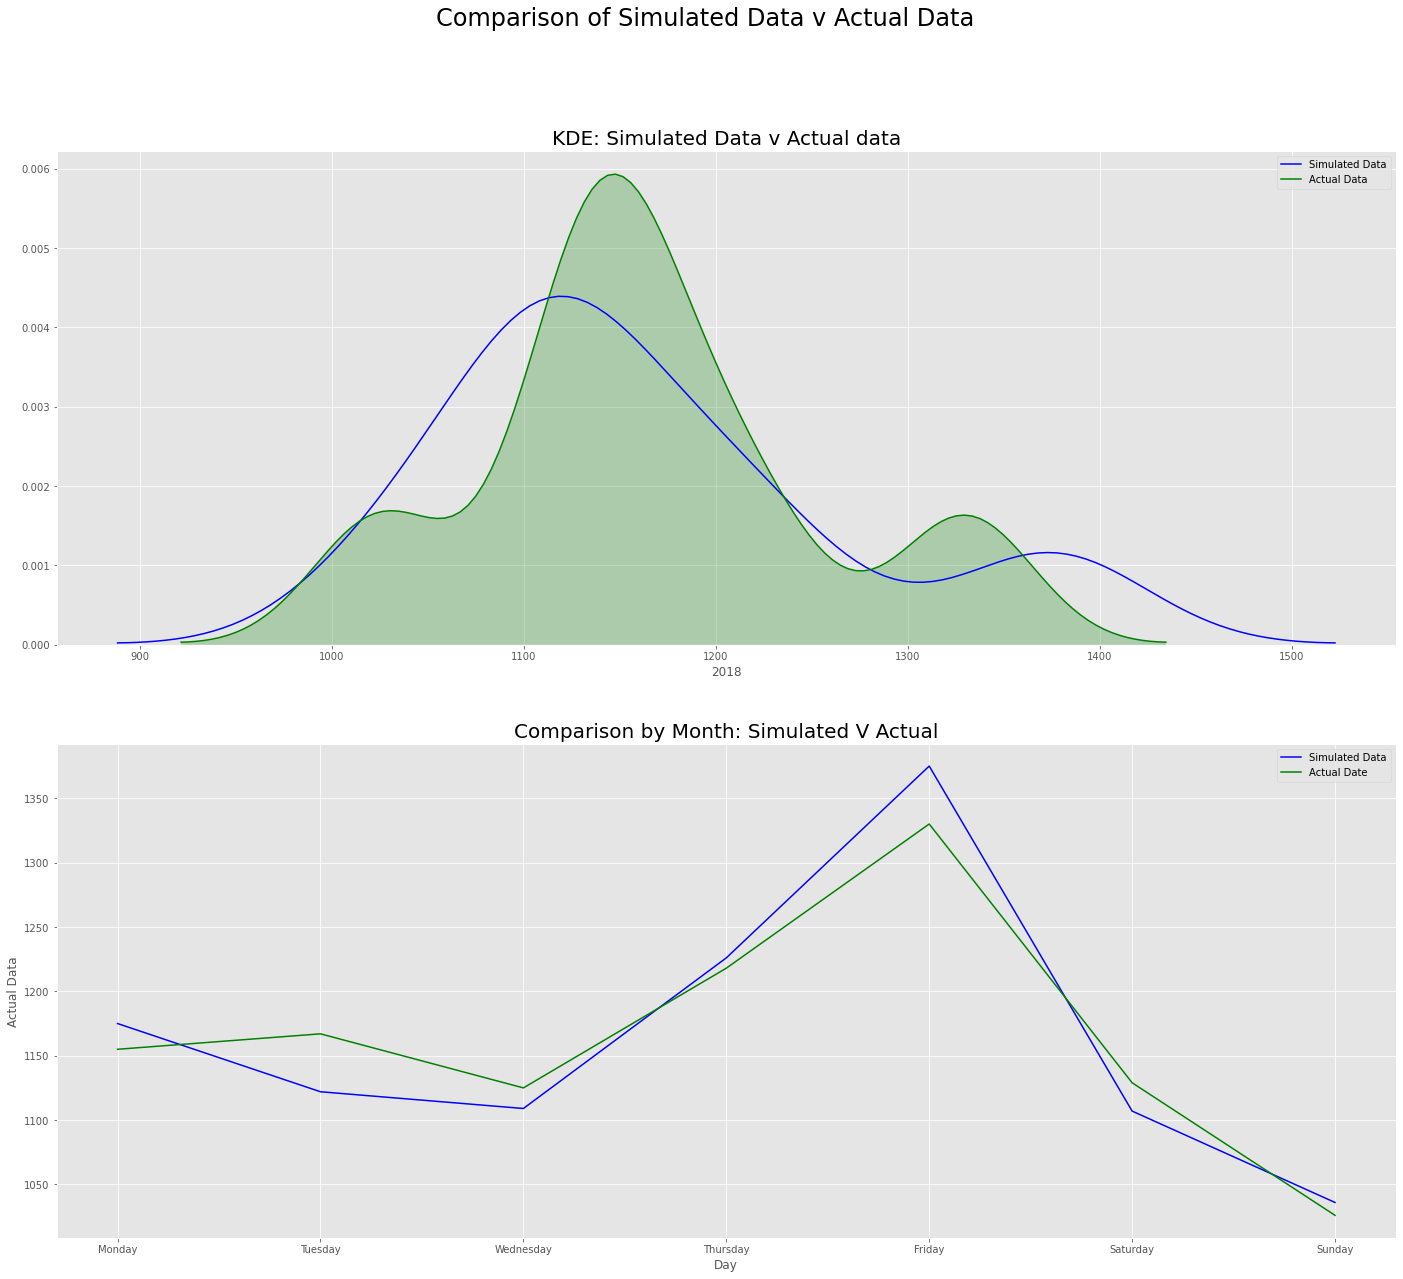

In [32]:
#KDE and Lineplot to display actual v simulated data
plt.suptitle('Comparison of Simulated Data v Actual Data',fontsize = 24)

#KDE
plt.subplot(2,1,1)
plt.title('KDE: Simulated Data v Actual data',fontsize=20)
sns.distplot(df['Day'].value_counts(),hist=False,color='Blue',kde_kws={"shade": False},label = 'Simulated Data')
sns.distplot(by_day_df.groupby('Day')['2018'].sum(),hist=False,color='Green',kde_kws={"shade": True}, label ='Actual Data')

#Lineplot
#ref #https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#bar-plot-of-column-values
plt.subplot(2,1,2)
plt.title('Comparison by Month: Simulated V Actual',fontsize=20)
sns.lineplot(x='Day',y='Simulated Data',data=day_compare_df,color='b',label='Simulated Data')
sns.lineplot(x='Day',y='Actual Data',data=day_compare_df,color='g',label='Actual Date');

***

#### Collison Type by Day Distribution <a class="anchor" id="sim6"></a>

The next part of our simulated data will be to distribte the collison type. We can use the research data to determine the ratio between fatal and Serious Collisions for each day.

This percentage breakdown will form our *p* values to be used in a Binominal Distribution.

We can view the % of collisions wic are serious from the table below.

In [33]:
#ref #https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#aggregation by serious collision
serious_by_day = by_day_df[by_day_df['Type'] == 'Serious'].groupby('Day').agg({'2018':sum}).reset_index()

#aggregation by fatal collisions
fatals_by_day = by_day_df[by_day_df['Type'] == 'Fatalities'].groupby('Day').agg({'2018':sum}).reset_index()

#creat new dataframe
collision_days = df_day_totals['Day']
collision_by_day_df = pd.DataFrame(collision_days)

collision_by_day_df['Fatal Collisons'] = fatals_by_day['2018']
collision_by_day_df['Serious Collisons'] = serious_by_day['2018']
collision_by_day_df['Total'] = collision_by_day_df['Serious Collisons']+collision_by_day_df['Fatal Collisons']
collision_by_day_df['% Serious'] = collision_by_day_df['Serious Collisons']/collision_by_day_df['Total']


collision_by_day_df

,Day,Fatal Collisons,Serious Collisons,Total,% Serious
1,Monday,18,1137,1155,0.984416
5,Tuesday,22,1145,1167,0.981148
6,Wednesday,17,1108,1125,0.984889
4,Thursday,15,1203,1218,0.987685
0,Friday,18,1312,1330,0.986466
2,Saturday,18,1111,1129,0.984057
3,Sunday,31,995,1026,0.969786


#### Plotting the ratio of collisions between Fatal and Serious 

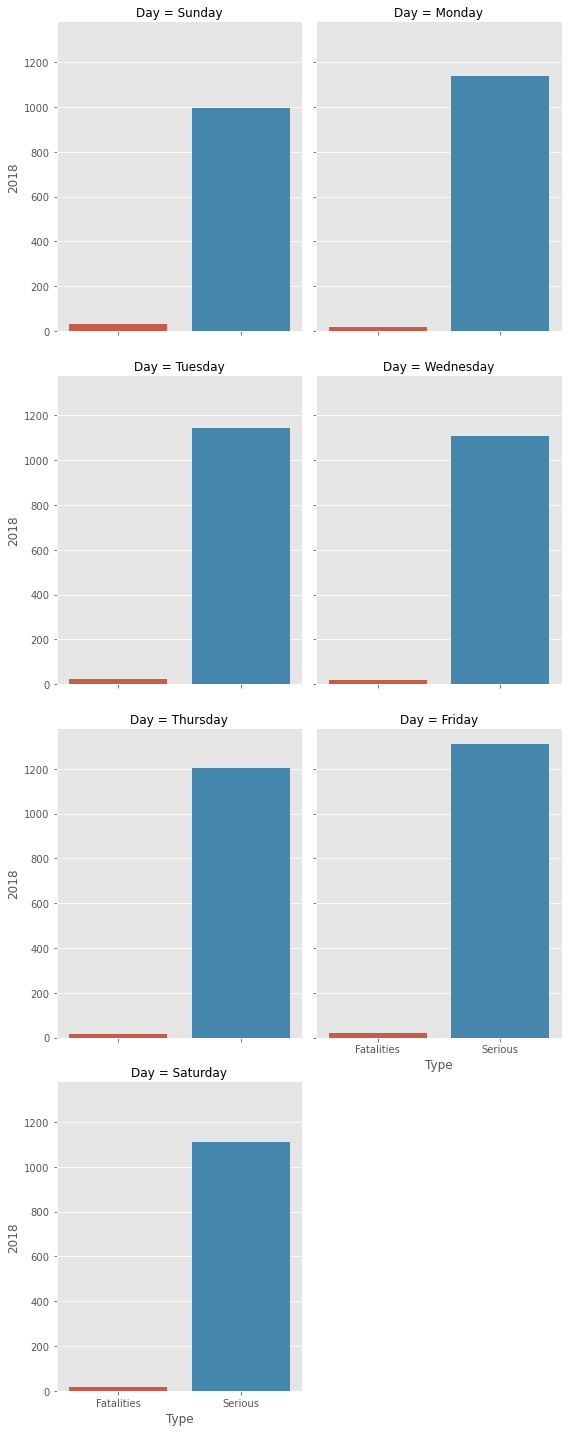

In [34]:
#ref #https://seaborn.pydata.org/generated/seaborn.catplot.html
#catplot to display by day Fatal:Serious ratio
sns.catplot(x='Type',y='2018',data=by_day_df,kind='bar',ci=True,col='Day',col_wrap=2, aspect=.8);


We can observe from the above plots that the ratio between Fatal and Serious per day is fairly uniform with the exception of Sundays where it look like there are slightly more Fatalities as a percentage of overall collisions. We can get a better visual of the % berakdown in the lineplot below.

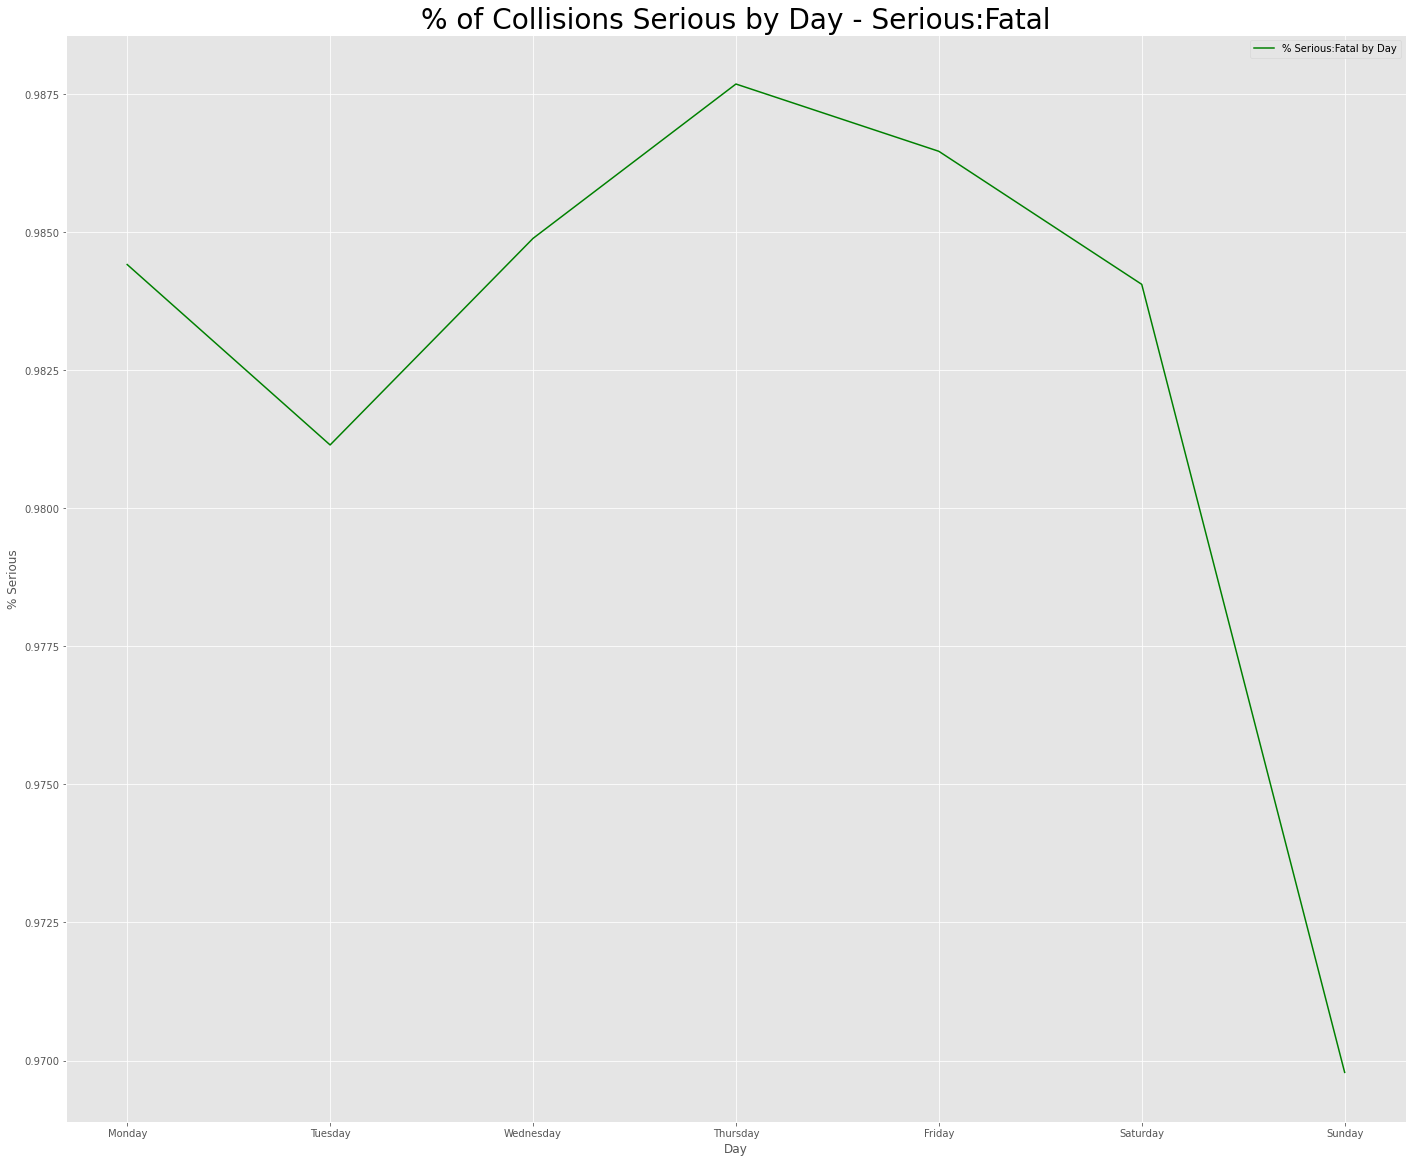

In [35]:
#plot title
plt.title('% of Collisions Serious by Day - Serious:Fatal',fontsize=28)

#lineplot to show ratio by day
sns.lineplot(x='Day',y='% Serious',data=collision_by_day_df,color='g',label='% Serious:Fatal by Day');

#### *P* values

We can create an array of values for day and the correspog *p* value to be used in the numpy.random.binomial function which will distribute collision type.

In [36]:
#% serious collisions:fatal collisions
collision_type_p_values = np.array(collision_by_day_df['% Serious'])
collision_type_p_values

array([0.98441558, 0.98114824, 0.98488889, 0.98768473, 0.98646617,
       0.98405669, 0.96978558])

#### Below are variables for each day of the week applying the binomial distribution.

In [37]:
#apply binomial distribution by day
# p-values according to day name
mon_binom = rng.binomial(1,collision_type_p_values[0],dataset_size)
tues_binom = rng.binomial(1,collision_type_p_values[1],dataset_size)
weds_binom = rng.binomial(1,collision_type_p_values[2],dataset_size)
thurs_binom = rng.binomial(1,collision_type_p_values[3],dataset_size)
fri_binom = rng.binomial(1,collision_type_p_values[4],dataset_size)
sat_binom = rng.binomial(1,collision_type_p_values[5],dataset_size)
sun_binom = rng.binomial(1,collision_type_p_values[6],dataset_size)

We now add the *Collision Type* column to our dataset.

Using the *numpy.where* function we can apply conditions to reurn values according to Day name.

In [38]:
#adding collision type to dataset
#np.where to apply condition based on day name
#ref https://stackoverflow.com/questions/16343752/numpy-where-function-multiple-conditions
df['Collision Type'] = np.where(df['Day']== 'Sunday', sun_binom,
                                          np.where(df['Day']== 'Saturday', sat_binom,
                                           np.where(df['Day']== 'Friday', fri_binom,
                                            np.where(df['Day']== 'Thursday',thurs_binom,
                                             np.where(df['Day']== 'Wednesday', weds_binom,
                                              np.where(df['Day']== 'Tuesday', tues_binom,
                                               mon_binom))))))

#### We convert the output of the binmomial function to string values.

* 1 Serious
* 0 Fatal

A lambda function with a condition is used to map these values

In [39]:
#ref https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
#converting binomial values to string
df['Collision Type'] = df['Collision Type'].map(lambda x: 'Serious' if x == 1 else 'Fatal')

#### We now compare our smulated data with the research data.
Arranging data to create a comparison Table

#### Day and Month Comparisons with Research Data <a class="anchor" id="sim7"></a>

In [40]:
#simulated fatal collisions by day
sim_fatals_by_day = df[df['Collision Type'] == 'Fatal'].groupby('Day').agg({'Collision Type':'count'}).reset_index()

#simulated serious collisions by day
sim_serious_by_day = df[df['Collision Type'] == 'Serious'].groupby('Day').agg({'Collision Type':'count'}).reset_index()

#dateframe creation
collision_by_day_df_compare = pd.DataFrame(df_day_totals['Day'])

collision_by_day_df_compare['Actual Fatal Collisons'] = collision_by_day_df['Fatal Collisons']
collision_by_day_df_compare['Actual Serious Collisons'] = collision_by_day_df['Serious Collisons']

collision_by_day_df_compare['Simulated Fatal Collisons'] = sim_fatals_by_day['Collision Type']
collision_by_day_df_compare['Simulated Serious Collisons'] = sim_serious_by_day['Collision Type']

collision_by_day_df_compare['Variance Fatal Collisions'] = collision_by_day_df_compare['Simulated Fatal Collisons'] - collision_by_day_df_compare['Actual Fatal Collisons']
collision_by_day_df_compare['Variance Serious Collisions'] = collision_by_day_df_compare['Simulated Serious Collisons'] - collision_by_day_df_compare['Actual Serious Collisons']

#### For Month Comparison

In [41]:
#serious collsions by month
serious_by_month = by_month_df[by_month_df['Type'] == 'Serious'].groupby('Month').agg({'2018':sum}).reset_index()

#fatals by month
fatals_by_month = by_month_df[by_month_df['Type'] == 'Fatalities'].groupby('Month').agg({'2018':sum}).reset_index()

collision_months = Normalised_2018_Collisions['Month']

#dataframe creation for comparision
collision_by_month_df = pd.DataFrame(collision_months)

collision_by_month_df['Actual Fatal Collisons'] = fatals_by_month['2018']
collision_by_month_df['Actual Serious Collisons'] = serious_by_month['2018']

serious_by_month_df = df[df['Collision Type'] == 'Serious'].groupby('Month').agg({'Collision Type':'count'}).reset_index()
fatals_by_month_df = df[df['Collision Type'] == 'Fatal'].groupby('Month').agg({'Collision Type':'count'}).reset_index()

#comparison dataframe
collision_by_month_df_compare = pd.DataFrame(collision_months)

#columns for simulated data
collision_by_month_df['Simulated Fatal Collisons'] = fatals_by_month_df['Collision Type']
collision_by_month_df['Simulated Serious Collisons'] = serious_by_month_df['Collision Type']

collision_by_month_df['Variance Fatal Collisions'] = collision_by_month_df['Simulated Fatal Collisons'] - collision_by_month_df['Actual Fatal Collisons']
collision_by_month_df['Variance Serious Collisions'] = collision_by_month_df['Simulated Serious Collisons'] - collision_by_month_df['Actual Serious Collisons']

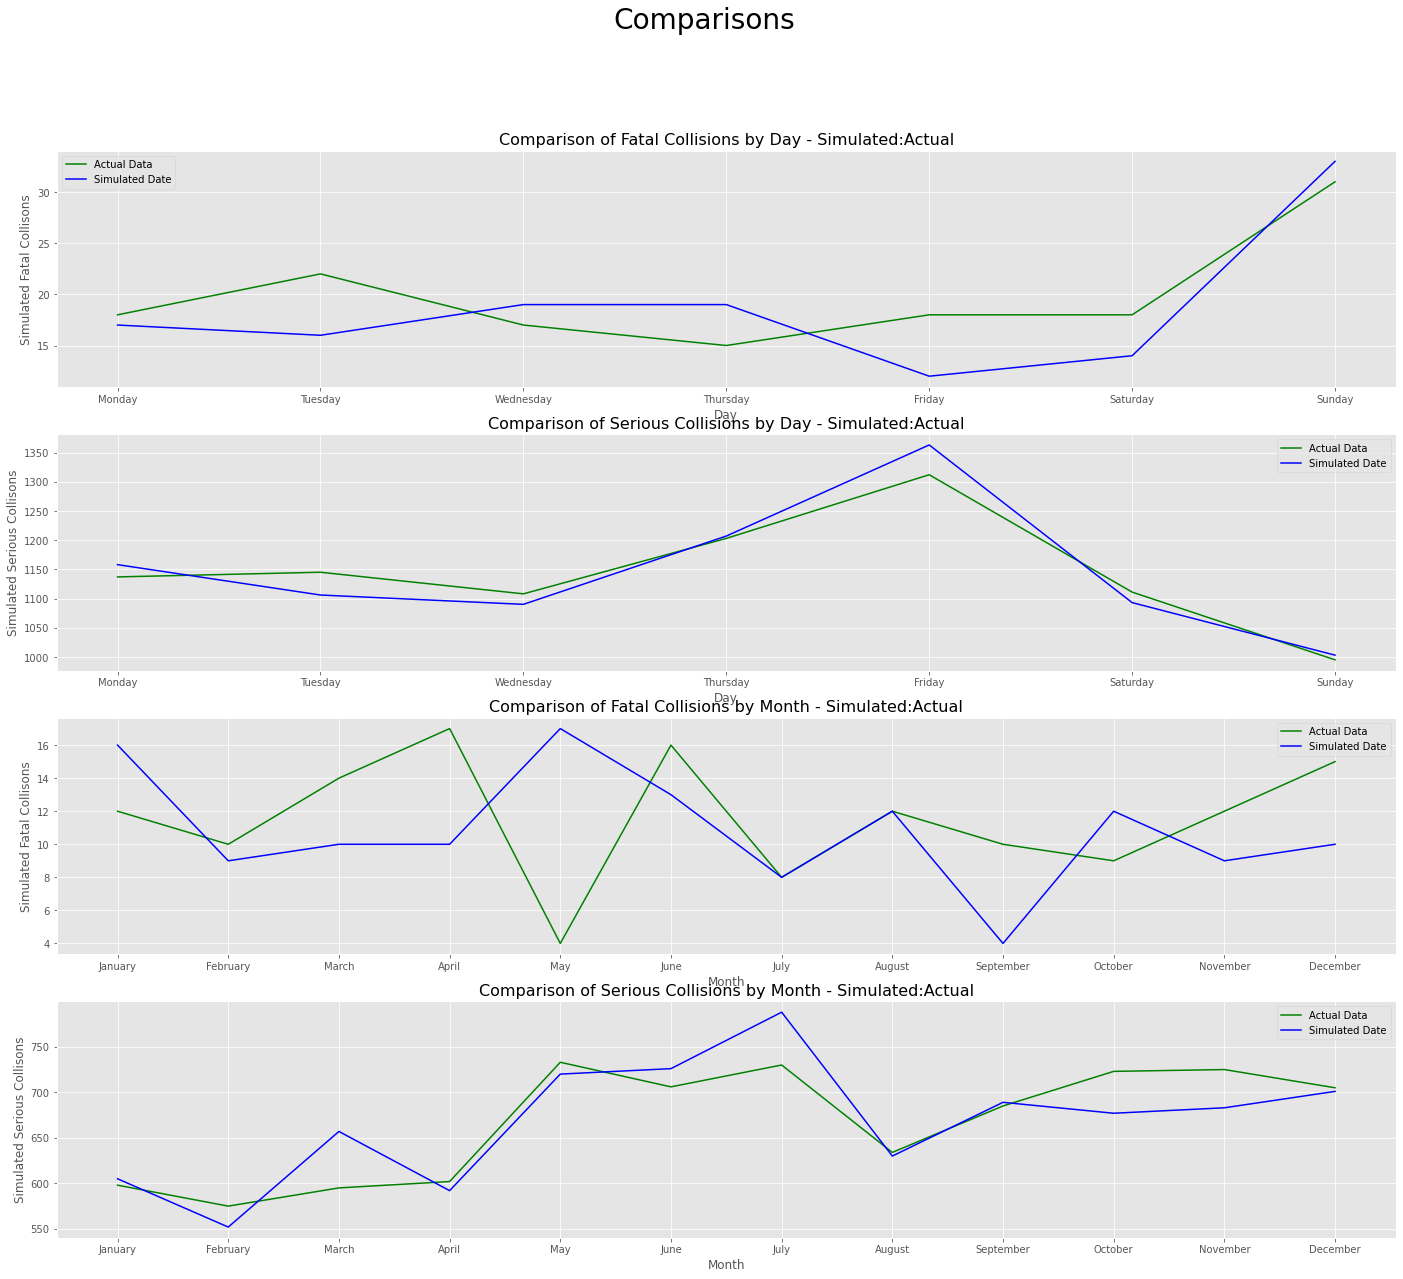

In [42]:
#comparion plots
plt.suptitle('Comparisons',fontsize=28)


plt.subplot(4,1,1)
plt.title('Comparison of Fatal Collisions by Day - Simulated:Actual',fontsize=16)
sns.lineplot(x='Day',y='Actual Fatal Collisons',data=collision_by_day_df_compare,color='g',label='Actual Data')
sns.lineplot(x='Day',y='Simulated Fatal Collisons',data=collision_by_day_df_compare,color='b',label='Simulated Date');

plt.subplot(4,1,2)
plt.title('Comparison of Serious Collisions by Day - Simulated:Actual',fontsize=16)
sns.lineplot(x='Day',y='Actual Serious Collisons',data=collision_by_day_df_compare,color='g',label='Actual Data')
sns.lineplot(x='Day',y='Simulated Serious Collisons',data=collision_by_day_df_compare,color='b',label='Simulated Date')

plt.subplot(4,1,3)
plt.title('Comparison of Fatal Collisions by Month - Simulated:Actual',fontsize=16)
sns.lineplot(x='Month',y='Actual Fatal Collisons',data=collision_by_month_df,color='g',label='Actual Data')
sns.lineplot(x='Month',y='Simulated Fatal Collisons',data=collision_by_month_df,color='b',label='Simulated Date')

plt.subplot(4,1,4)
plt.title('Comparison of Serious Collisions by Month - Simulated:Actual',fontsize=16)
sns.lineplot(x='Month',y='Actual Serious Collisons',data=collision_by_month_df,color='g',label='Actual Data')
sns.lineplot(x='Month',y='Simulated Serious Collisons',data=collision_by_month_df,color='b',label='Simulated Date');

In [43]:
#comparison by day
collision_by_day_df_compare

,Day,Actual Fatal Collisons,Actual Serious Collisons,Simulated Fatal Collisons,Simulated Serious Collisons,Variance Fatal Collisions,Variance Serious Collisions
1,Monday,18,1137,17,1158,-1,21
5,Tuesday,22,1145,16,1106,-6,-39
6,Wednesday,17,1108,19,1090,2,-18
4,Thursday,15,1203,19,1207,4,4
0,Friday,18,1312,12,1363,-6,51
2,Saturday,18,1111,14,1093,-4,-18
3,Sunday,31,995,33,1003,2,8


In [44]:
#comparison table by month
collision_by_month_df

,Month,Actual Fatal Collisons,Actual Serious Collisons,Simulated Fatal Collisons,Simulated Serious Collisons,Variance Fatal Collisions,Variance Serious Collisions
4,January,12,598,16,605,4,7
3,February,10,575,9,552,-1,-23
7,March,14,595,10,657,-4,62
0,April,17,602,10,592,-7,-10
8,May,4,733,17,720,13,-13
6,June,16,706,13,726,-3,20
5,July,8,730,8,788,0,58
1,August,12,634,12,630,0,-4
11,September,10,685,4,689,-6,4
10,October,9,723,12,677,3,-46


*** 

#### Gender <a class="anchor" id="sim8"></a>

The next column will be to apply a gender to each collision. We can use the research data to determine the % breakdown by male and female and by collision type.

In [45]:
#collision data by age groups. This will be used for gender split also
by_age_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Age.csv')

#first five rows of dataset
by_age_df.head(5)

,Sex,Age,Type,2014,2015,2016,2017,2018
0,Male,0 - 5 years,Fatalities,2,1,1,0,0
1,Male,0 - 5 years,Serious,118,105,97,89,76
2,Male,6 - 9 years,Fatalities,3,0,0,3,0
3,Male,6 - 9 years,Serious,123,95,84,90,92
4,Male,10 - 14 years,Fatalities,2,1,7,0,2


In [46]:
#fatal collisons by gender by gender, pandas groupby and agg function
fatals_by_gender = by_age_df[by_age_df['Type'] == 'Fatalities'].groupby('Sex').agg({'2018':sum}).reset_index()

#serious collisons by gender, pandas groupby and agg function 
serious_by_gender = by_age_df[by_age_df['Type'] == 'Serious'].groupby('Sex').agg({'2018':sum}).reset_index()

# all collisions by gender
gender_groupby = by_age_df.groupby('Sex')['2018'].sum().to_frame().reset_index()

#collisions by gender dataframe
collisions_by_gender = pd.DataFrame(gender_groupby['Sex'])

#columns of collisons by gender dataset
collisions_by_gender['Fatal'] = fatals_by_gender['2018']
collisions_by_gender['Serious'] = serious_by_gender['2018']
collisions_by_gender['Total'] = collisions_by_gender['Fatal']+ collisions_by_gender['Serious']
collisions_by_gender['% Serious'] = collisions_by_gender['Serious']/collisions_by_gender['Total']

#### p values for binomial distribution between male and female

In [47]:
#p value by males for all collisons using pandas iloc slicing function
gender_p_value = collisions_by_gender.iloc[1:,3][1] / (collisions_by_gender.iloc[1:,3][1] + collisions_by_gender.iloc[0:1,3][0])

#p value by males for fatal collisons using pandas iloc slicing function
gender_fatals_p_value = collisions_by_gender.iloc[1:,1][1]/(collisions_by_gender.iloc[1:,1][1] +collisions_by_gender.iloc[0:1,1][0])

#p value by males for serious collisons using pandas iloc slicing function
gender_serious_p_value = collisions_by_gender.iloc[1:,2][1]/(collisions_by_gender.iloc[1:,2][1] +collisions_by_gender.iloc[0:1,2][0])
print("All Collisions p value:" ,gender_p_value)
print("Fatal Collisions p value:",gender_fatals_p_value)
print("Serious Collisions p value:",gender_serious_p_value)

All Collisions p value: 0.5786551511412709
Fatal Collisions p value: 0.7841726618705036
Serious Collisions p value: 0.5750690434345971


#### Gender Distribution

We can see that Males make up approx. 57% for all collisions and serious collisions. However for Fatalities the distribution is quite different where approx 78% of Fatalities are male. 

We will have to apply a gender condtion when applying the binmoial distribution.

In [48]:
#adding gender column to dataset
#binomial function
#np.where function to add a condition between fatal and serious collision types
df['Gender'] = np.where(df['Collision Type']== 'Fatal', rng.binomial(1,gender_fatals_p_value,dataset_size)
                        ,rng.binomial(1,gender_serious_p_value,dataset_size))

In [49]:
#lambda to cinvert result of binomial 1 or 0 to Male or Female
df['Gender'] = df['Gender'].map(lambda x: 'Male' if x == 1 else 'Female')

#### Overview by collsion type of the gender split in simulated dataset

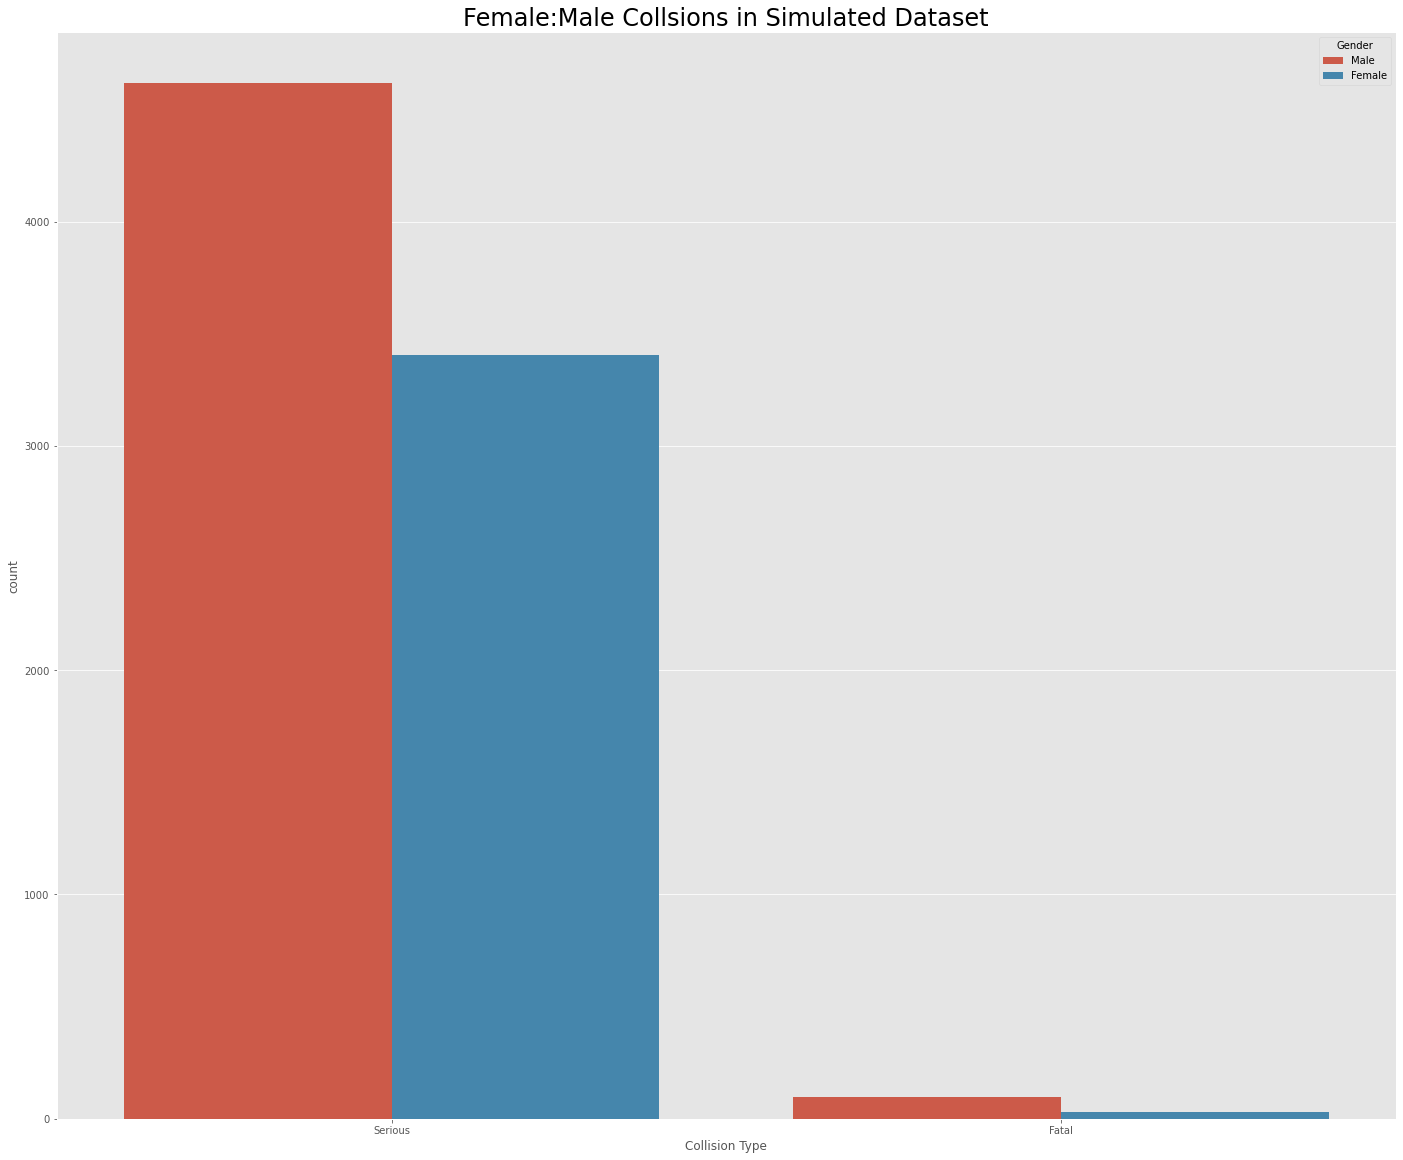

In [53]:
plt.title('Female:Male Collsions in Simulated Dataset',fontsize=24)
sns.countplot(x="Collision Type", hue="Gender", data=df);

***

#### Age Groups <a class="anchor" id="sim9"></a>

From the research data we can determine the % breakdown by age band and apply to our dataset applying the numpy.choice function.

In [54]:
#% breakdonw by age group 
normalised_age_breakdown = by_age_df.groupby('Age')['2018'].sum()/sum(by_age_df.groupby('Age')['2018'].sum())

#dataframe for % breakdown by age group
normalised_age_breakdown_df = pd.DataFrame(normalised_age_breakdown).reset_index()
normalised_age_breakdown_df

,Age,2018
0,0 - 5 years,0.016533
1,10 - 14 years,0.034670
2,15 - 17 years,0.036151
3,18 - 20 years,0.058359
4,21 - 24 years,0.083775
5,25 - 34 years,0.206663
6,35 - 44 years,0.186552
7,45 - 54 years,0.145589
8,55 - 64 years,0.103023
9,6 - 9 years,0.020975


#### Arranging *p* values

In [55]:
#array of p values for age group 
age_p_values = np.array(normalised_age_breakdown_df['2018'])

#list of age groups
age_groups = list(normalised_age_breakdown_df['Age'])

#### add new age band column to dataset

In [56]:
# new age band column to the simulated dataset
#numpy.random.choice function
df['Age Band'] = rng.choice(age_groups,dataset_size,p=(age_p_values))

#### normalised vaues from new dataset

In [57]:
#dataframe for % breakdown from simualted dataset
age_bands = df['Age Band'].value_counts(normalize=True)
age_band_df = age_bands.to_frame().reset_index()

#### Plot for comparision

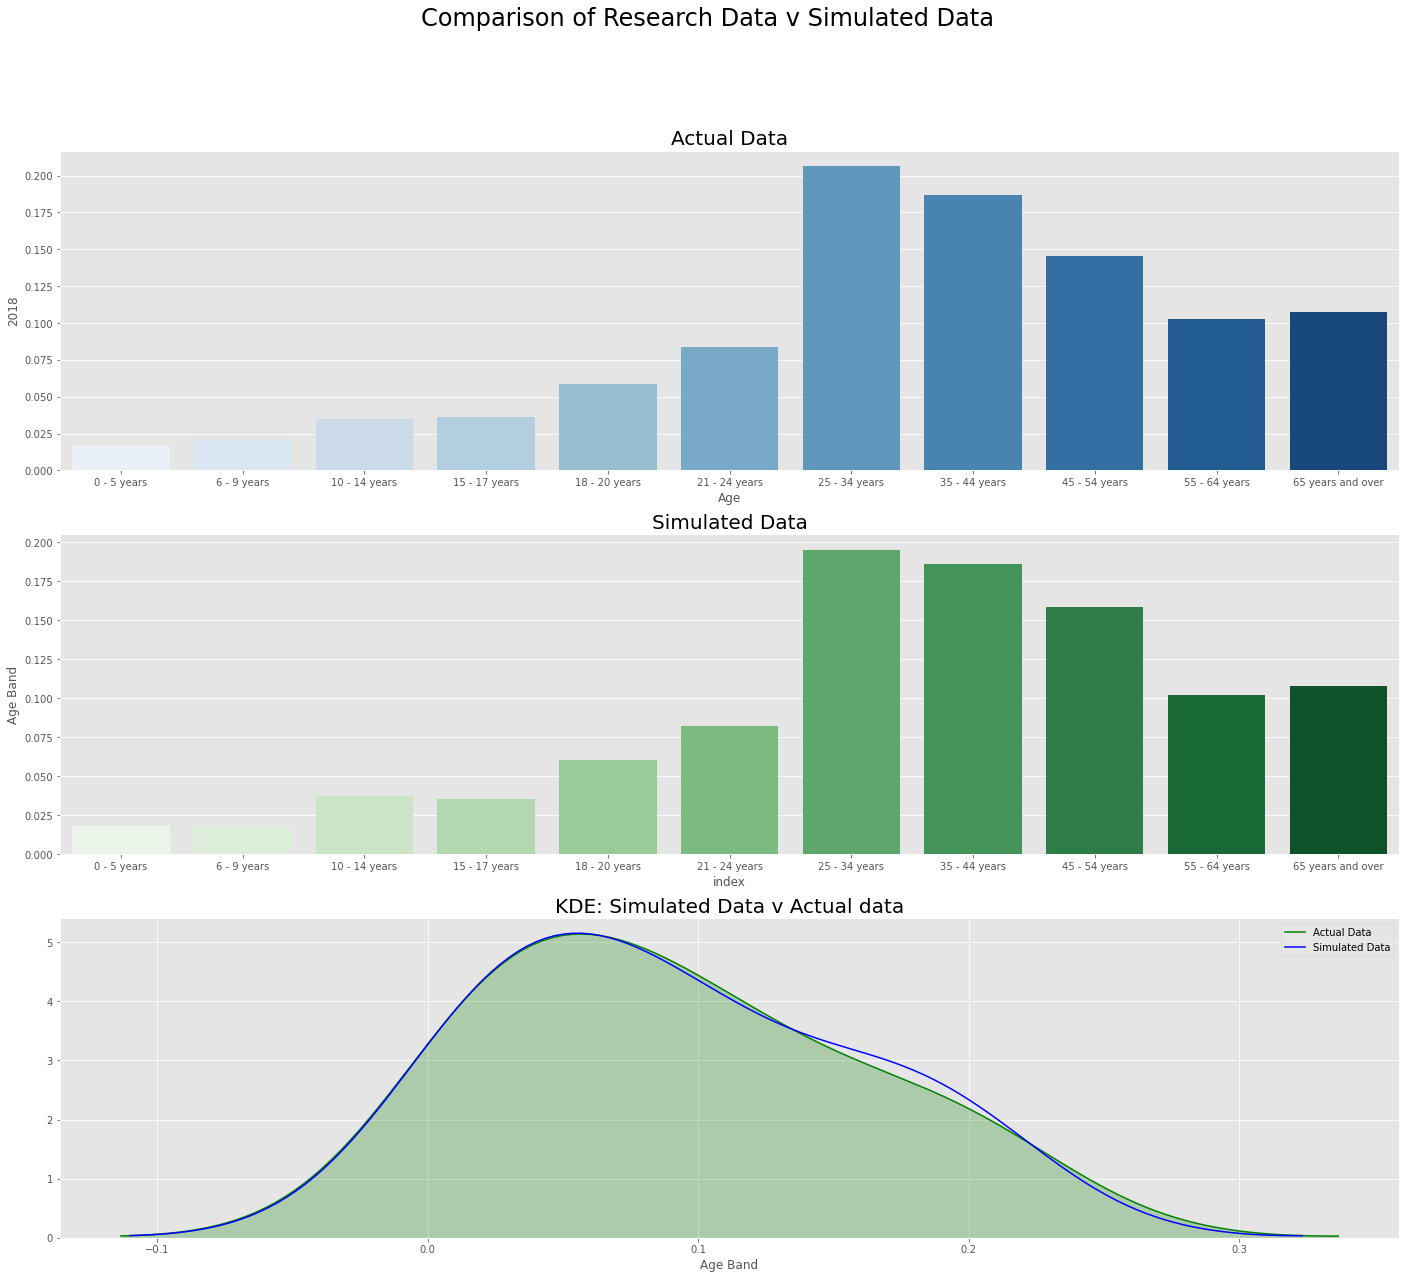

In [58]:
plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

plt.subplot(3,1,1)
plt.title('Actual Data',fontsize=20)
sns.barplot(x='Age',y='2018',data=normalised_age_breakdown_df,ci=None,palette='Blues',order=age_groups_sorted)

plt.subplot(3,1,2)

plt.title('Simulated Data',fontsize=20)
sns.barplot(x='index',y='Age Band',data=age_band_df,palette='Greens',order=age_groups_sorted)

plt.subplot(3,1,3)
plt.title('KDE: Simulated Data v Actual data',fontsize=20)
sns.distplot(normalised_age_breakdown_df['2018'],hist=False,kde_kws={"shade": True},color='Green',label = 'Actual Data')
sns.distplot(age_band_df['Age Band'],hist=False,color='Blue',kde_kws={"shade": False}, label ='Simulated Data');

***

#### Timebands <a class="anchor" id="sim10"></a>

The next coumn to be added to our dataset is the breakdown of collisions by time. We will be dealing with 3 hour time bands and taking the distribution from the research data and applying it to our simulatation, We may have to split between Fatal and Serious again depending on the % breakdown.

In [59]:
#import research data
by_time_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Hour.csv')

#### New column breaking hour values into three hour time bands

In [60]:
#np.where function to apply condtitions to create 3 hours time bands 
by_time_df['time_band']=np.where(by_time_df['Hour'] <3,'00:00 -03:00',
         np.where(by_time_df['Hour'] <6, '03:00 - 06:00',
                  np.where(by_time_df['Hour'] <9, '06:00 - 09:00',
                           np.where(by_time_df['Hour'] <12, '09:00 - 12:00',
                                    np.where(by_time_df['Hour'] <15, '12:00 - 15:00',
                                             np.where(by_time_df['Hour'] <18, '15:00 - 18:00',
                                                      np.where(by_time_df['Hour'] <21,'18:00 - 21:00',
                                                               '21:00 - 24:00')))))))

In [61]:
#first five rows of time data
by_time_df.head(5)

,Hour,Type,2014,2015,2016,2017,2018,time_band
0,0,Fatalities,3,6,4,7,6,00:00 -03:00
1,0,Serious,161,178,167,131,166,00:00 -03:00
2,1,Fatalities,10,5,11,7,7,00:00 -03:00
3,1,Serious,151,139,135,116,115,00:00 -03:00
4,2,Fatalities,6,10,6,4,1,00:00 -03:00


In [62]:
#fatal collisions by timebad, pandas groupby and agg functions
fatals_by_time = by_time_df[by_time_df['Type'] == 'Fatalities'].groupby('time_band').agg({'2018':sum}).reset_index()

#serious by timebad, pandas groupby and agg functions
serious_by_time = by_time_df[by_time_df['Type'] == 'Serious'].groupby('time_band').agg({'2018':sum}).reset_index()

In [63]:
# % breakdown by time band for fatals
fatals_by_time['%']=fatals_by_time['2018']/sum(fatals_by_time['2018'])

# % breakdown by time band for serious
serious_by_time['%']=serious_by_time['2018']/sum(serious_by_time['2018'])


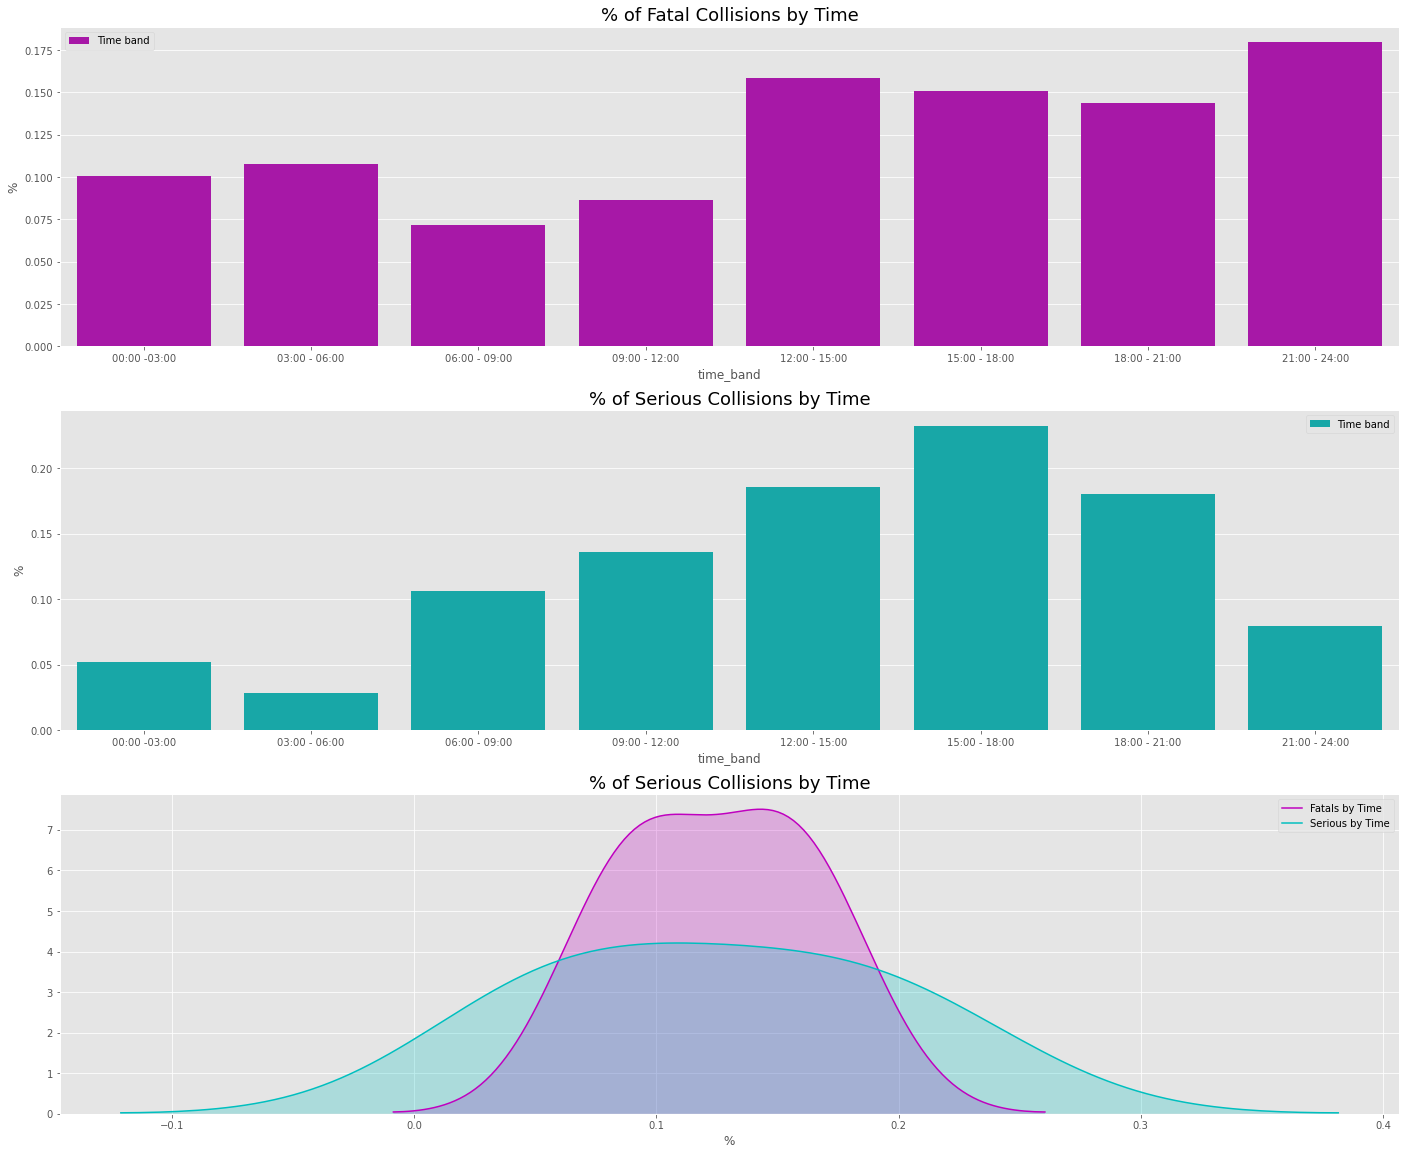

In [64]:
plt.subplot(3,1,1)
plt.title('% of Fatal Collisions by Time',fontsize=18)
sns.barplot(x='time_band',y='%',data=fatals_by_time,label="Time band",color='m')
plt.legend()

plt.subplot(3,1,2)
plt.title('% of Serious Collisions by Time',fontsize=18)
sns.barplot(x='time_band',y='%',data=serious_by_time,label="Time band",color='c')
plt.legend()

plt.subplot(3,1,3)
plt.title('% of Serious Collisions by Time',fontsize=18)
sns.distplot(fatals_by_time['%'],hist=False,kde_kws={"shade": True},color='m',label = 'Fatals by Time')
sns.distplot(serious_by_time['%'],hist=False,kde_kws={"shade": True},color='c',label = 'Serious by Time')
plt.legend();

#### We will use some conditions to distribute time bands accroding to fatal and serious as their distribution and % breakdown differ

In [65]:
#fatals by time p values
fatals_time_p = np.array(fatals_by_time['%'])
fatals_time_bands = np.array(fatals_by_time['time_band'])

#serious by time p values
serious_time_p = np.array(serious_by_time['%'])
serious_time_bands = np.array(serious_by_time['time_band'])


#### Adding new column to our dataset based on the *p* values for fatals by time and serious by time

In [66]:
#timeband column added to dataset
#numpy.random.choice function applied
df['Time_Band'] = np.where(df['Collision Type']== 'Fatal', rng.choice(fatals_time_bands, dataset_size, p=fatals_time_p)
                        ,rng.choice(serious_time_bands, dataset_size, p=serious_time_p))

#### A look at our new column broken down by collision type to compare distribution with actual data

In [67]:
#simulated data of fatals by time band
sim_fatals_by_time = df[df['Collision Type'] == 'Fatal'].groupby('Time_Band').agg({'Collision Type':'count'}).reset_index()

#simulated data of serious by time band
sim_serious_by_time = df[df['Collision Type'] == 'Serious'].groupby('Time_Band').agg({'Collision Type':'count'}).reset_index()

# % breakdown of smualted fatals and serious by time band
sim_fatals_by_time['%']=sim_fatals_by_time['Collision Type']/sum(sim_fatals_by_time['Collision Type'])
sim_serious_by_time['%']=sim_serious_by_time['Collision Type']/sum(sim_serious_by_time['Collision Type'])

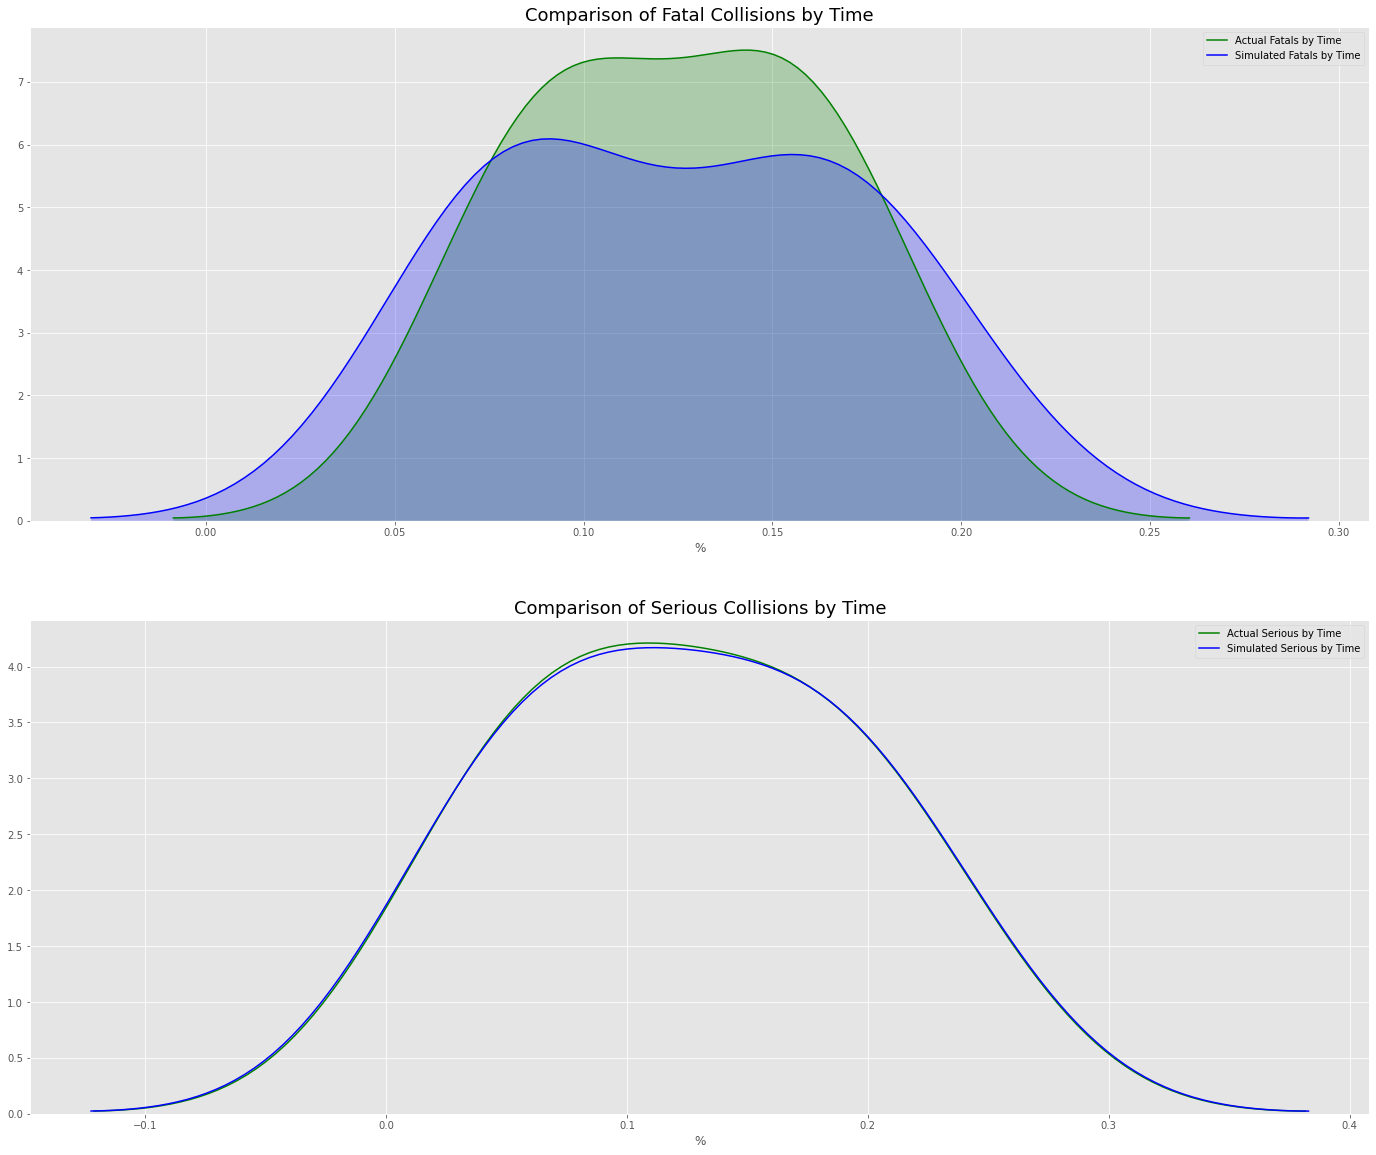

In [68]:
plt.subplot(2,1,1)
plt.title('Comparison of Fatal Collisions by Time',fontsize=18)
sns.distplot(fatals_by_time['%'],hist=False,kde_kws={"shade": True},color='Green',label = 'Actual Fatals by Time')
sns.distplot(sim_fatals_by_time['%'],hist=False,kde_kws={"shade": True},color='Blue',label = 'Simulated Fatals by Time')
plt.legend()

plt.subplot(2,1,2)
plt.title('Comparison of Serious Collisions by Time',fontsize=18)
sns.distplot(serious_by_time['%'],hist=False,kde_kws={"shade": False},color='Green',label = 'Actual Serious by Time')
sns.distplot(sim_serious_by_time['%'],hist=False,kde_kws={"shade": False},color='Blue',label = 'Simulated Serious by Time')
plt.legend();

***

#### Road User Type <a class="anchor" id="sim11"></a>

In [69]:
#collisons by road user
by_road_user = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Roaduser.csv')

#first five rows of dataset
by_road_user.head(5)

,User,Type,2014,2015,2016,2017,2018
0,Pedestrians,Serious,1065,1043,1042,1136,1105
1,Pedal cyclists,Serious,864,933,971,1061,1074
2,Motor cyclists,Serious,291,338,383,355,470
3,All Car users,Serious,5237,4910,4754,4683,4686
4,Other road users,Serious,622,616,623,547,676


In [70]:
#fatals by road user 
fatals_by_user = by_road_user[by_road_user['Type'] == 'Fatalities'].groupby('User').agg({'2018':sum}).reset_index()

#serious collsions by road user
serious_by_user = by_road_user[by_road_user['Type'] == 'Serious'].groupby('User').agg({'2018':sum}).reset_index()


# % breakdown of fatals and serious by road user
fatals_by_user['%'] = fatals_by_user['2018']/sum(fatals_by_user['2018'])
serious_by_user['%'] = serious_by_user['2018']/sum(serious_by_user['2018'])

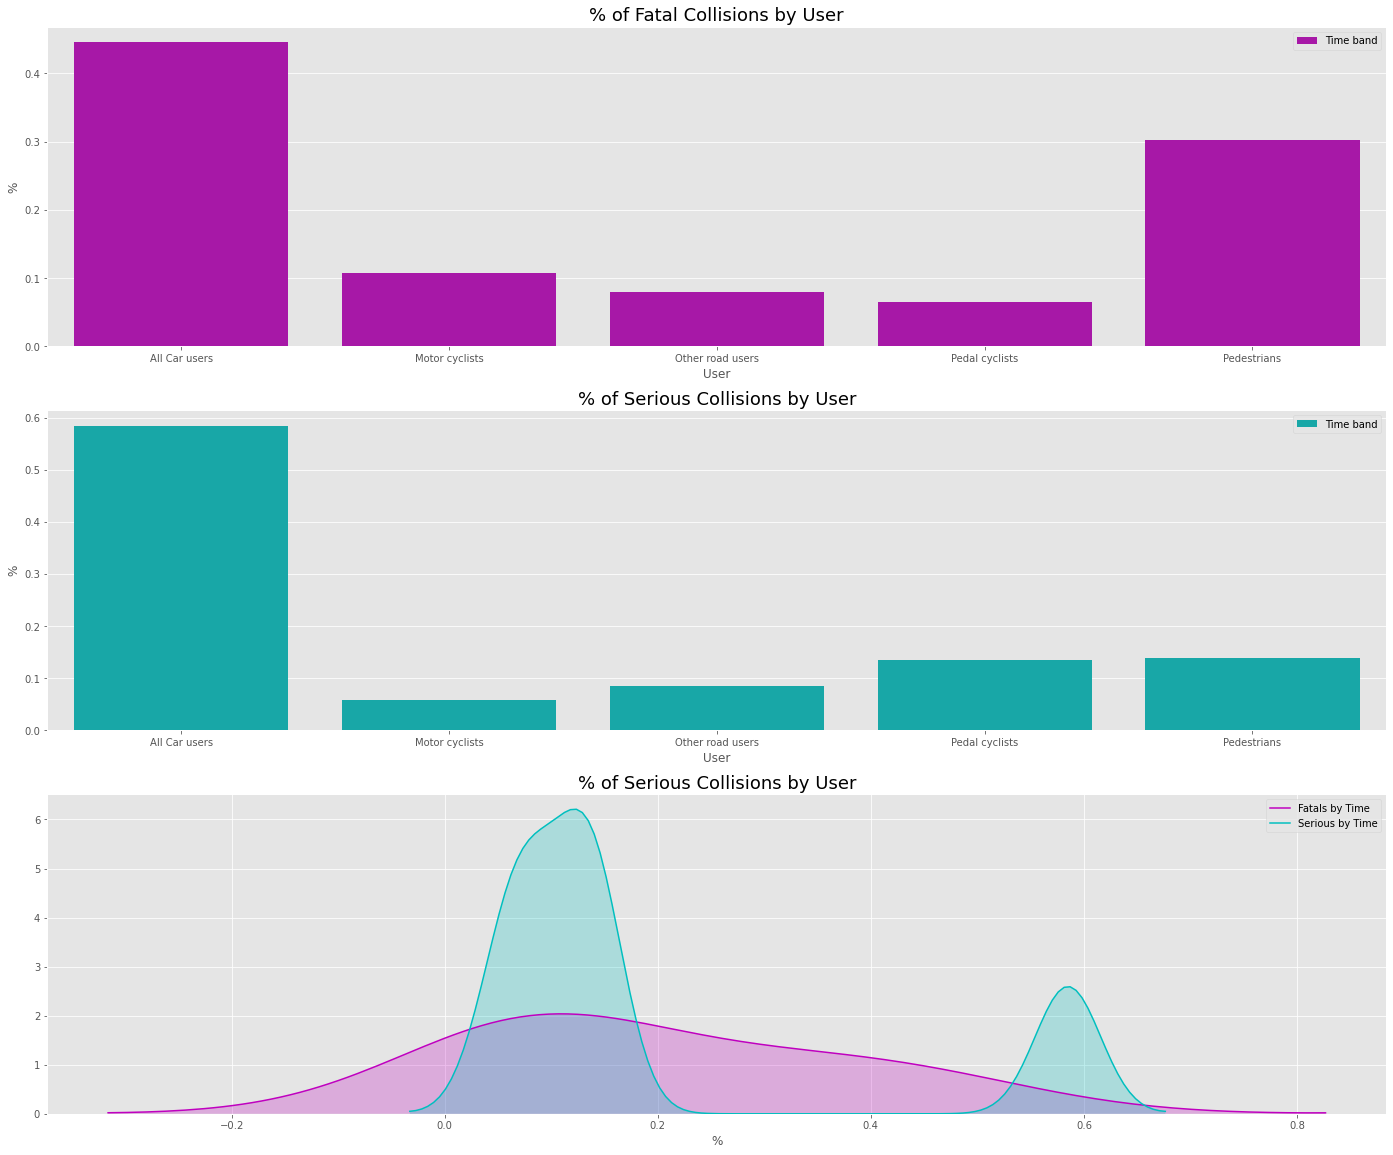

In [71]:
plt.subplot(3,1,1)
plt.title('% of Fatal Collisions by User',fontsize=18)
sns.barplot(x='User',y='%',data=fatals_by_user,label="Time band",color='m')
plt.legend()

plt.subplot(3,1,2)
plt.title('% of Serious Collisions by User',fontsize=18)
sns.barplot(x='User',y='%',data=serious_by_user,label="Time band",color='c')
plt.legend()

plt.subplot(3,1,3)
plt.title('% of Serious Collisions by User',fontsize=18)
sns.distplot(fatals_by_user['%'],hist=False,kde_kws={"shade": True},color='m',label = 'Fatals by Time')
sns.distplot(serious_by_user['%'],hist=False,kde_kws={"shade": True},color='c',label = 'Serious by Time')
plt.legend();

#### Again, we will use some conditions to distribute time bands accroding to fatal and serious as their distribution and % breakdown differ

In [72]:
#fatals by time p values
fatals_user_p = np.array(fatals_by_user['%'])
fatals_user_group = np.array(fatals_by_user['User'])

#serious by time p values
serious_user_p = np.array(serious_by_user['%'])
serious_user_group = np.array(serious_by_user['User'])


In [73]:
#adding new column to dataset based on road user
#numpy.random.choice function applied
#np.where to apply different p values between fatal and serious
df['Road User'] = np.where(df['Collision Type']== 'Fatal', rng.choice(fatals_user_group, dataset_size, p=fatals_user_p)
                        ,rng.choice(serious_user_group, dataset_size, p=serious_user_p))

#### A look at our new column broken down by collision type to compare distribution with actual data

In [74]:
#simulated data fatals
sim_fatals_by_user = df[df['Collision Type'] == 'Fatal'].groupby('Road User').agg({'Collision Type':'count'}).reset_index()

#simulated data serious
sim_serious_by_user = df[df['Collision Type'] == 'Serious'].groupby('Road User').agg({'Collision Type':'count'}).reset_index()

#% breakdown of fatals and serious by road user
sim_fatals_by_user['%']=sim_fatals_by_user['Collision Type']/sum(sim_fatals_by_user['Collision Type'])
sim_serious_by_user['%']=sim_serious_by_user['Collision Type']/sum(sim_serious_by_user['Collision Type'])

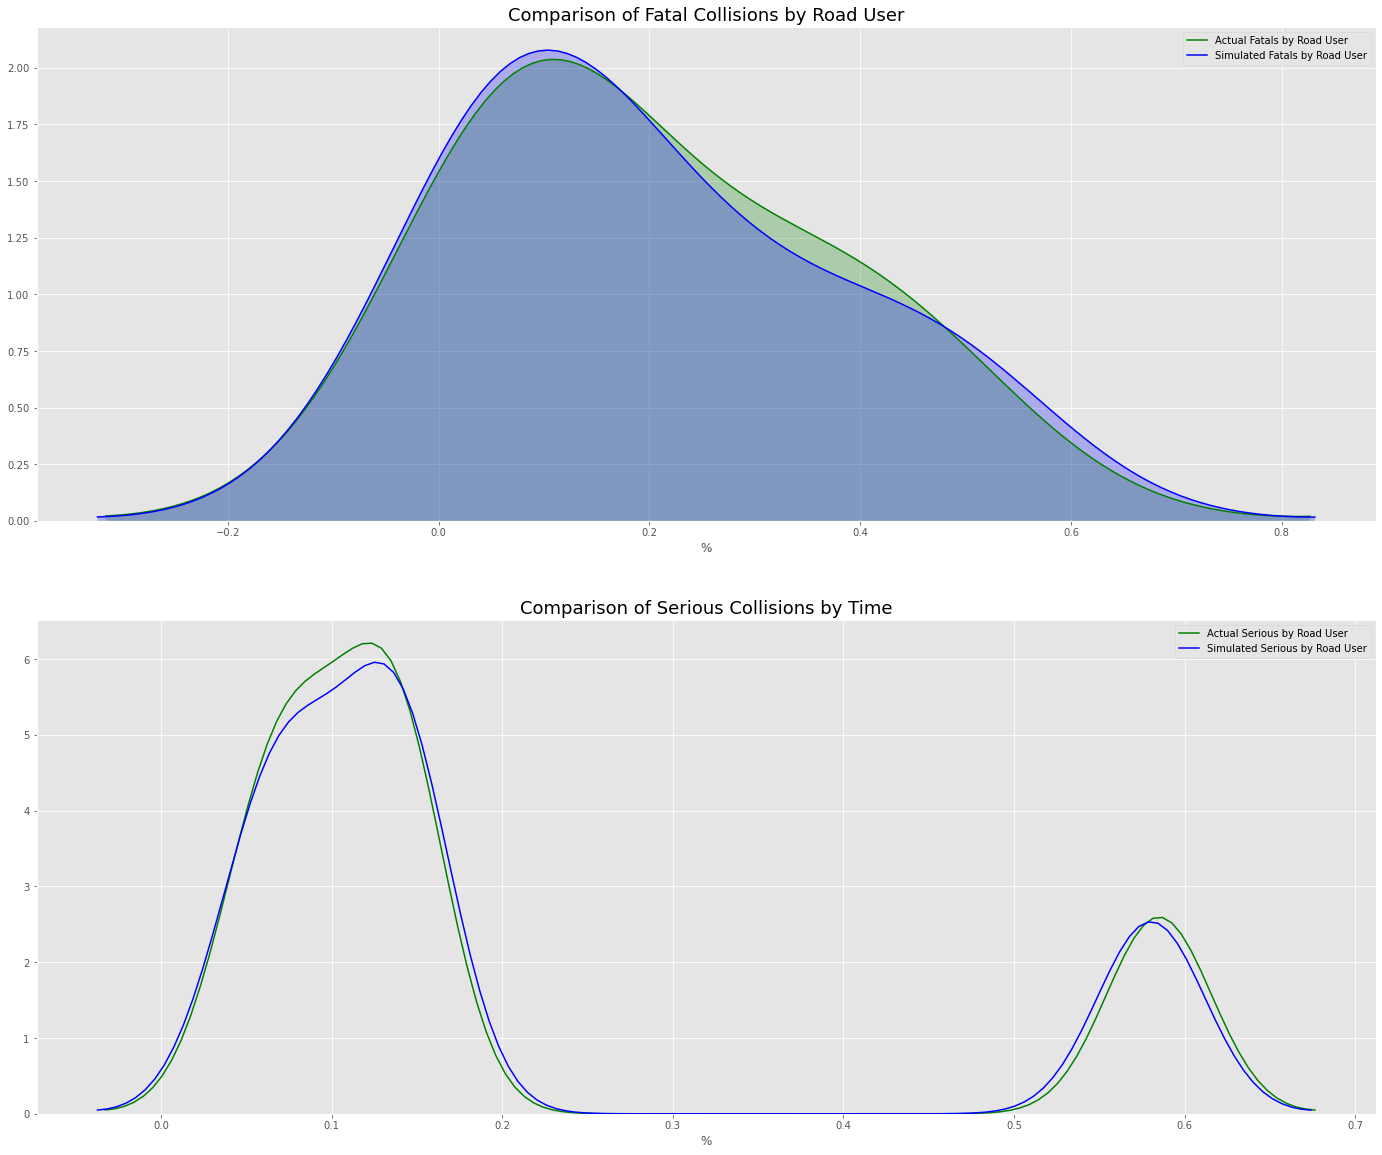

In [75]:
plt.subplot(2,1,1)
plt.title('Comparison of Fatal Collisions by Road User',fontsize=18)
sns.distplot(fatals_by_user['%'],hist=False,kde_kws={"shade": True},color='Green',label = 'Actual Fatals by Road User')
sns.distplot(sim_fatals_by_user['%'],hist=False,kde_kws={"shade": True},color='Blue',label = 'Simulated Fatals by Road User')
plt.legend()

plt.subplot(2,1,2)
plt.title('Comparison of Serious Collisions by Time',fontsize=18)
sns.distplot(serious_by_user['%'],hist=False,kde_kws={"shade": False},color='Green',label = 'Actual Serious by Road User')
sns.distplot(sim_serious_by_user['%'],hist=False,kde_kws={"shade": False},color='Blue',label = 'Simulated Serious by Road User')
plt.legend();

***

### Summary Plots <a class="anchor" id="p1"></a>


***

#### Collisions by Gender <a class="anchor" id="p2"></a>

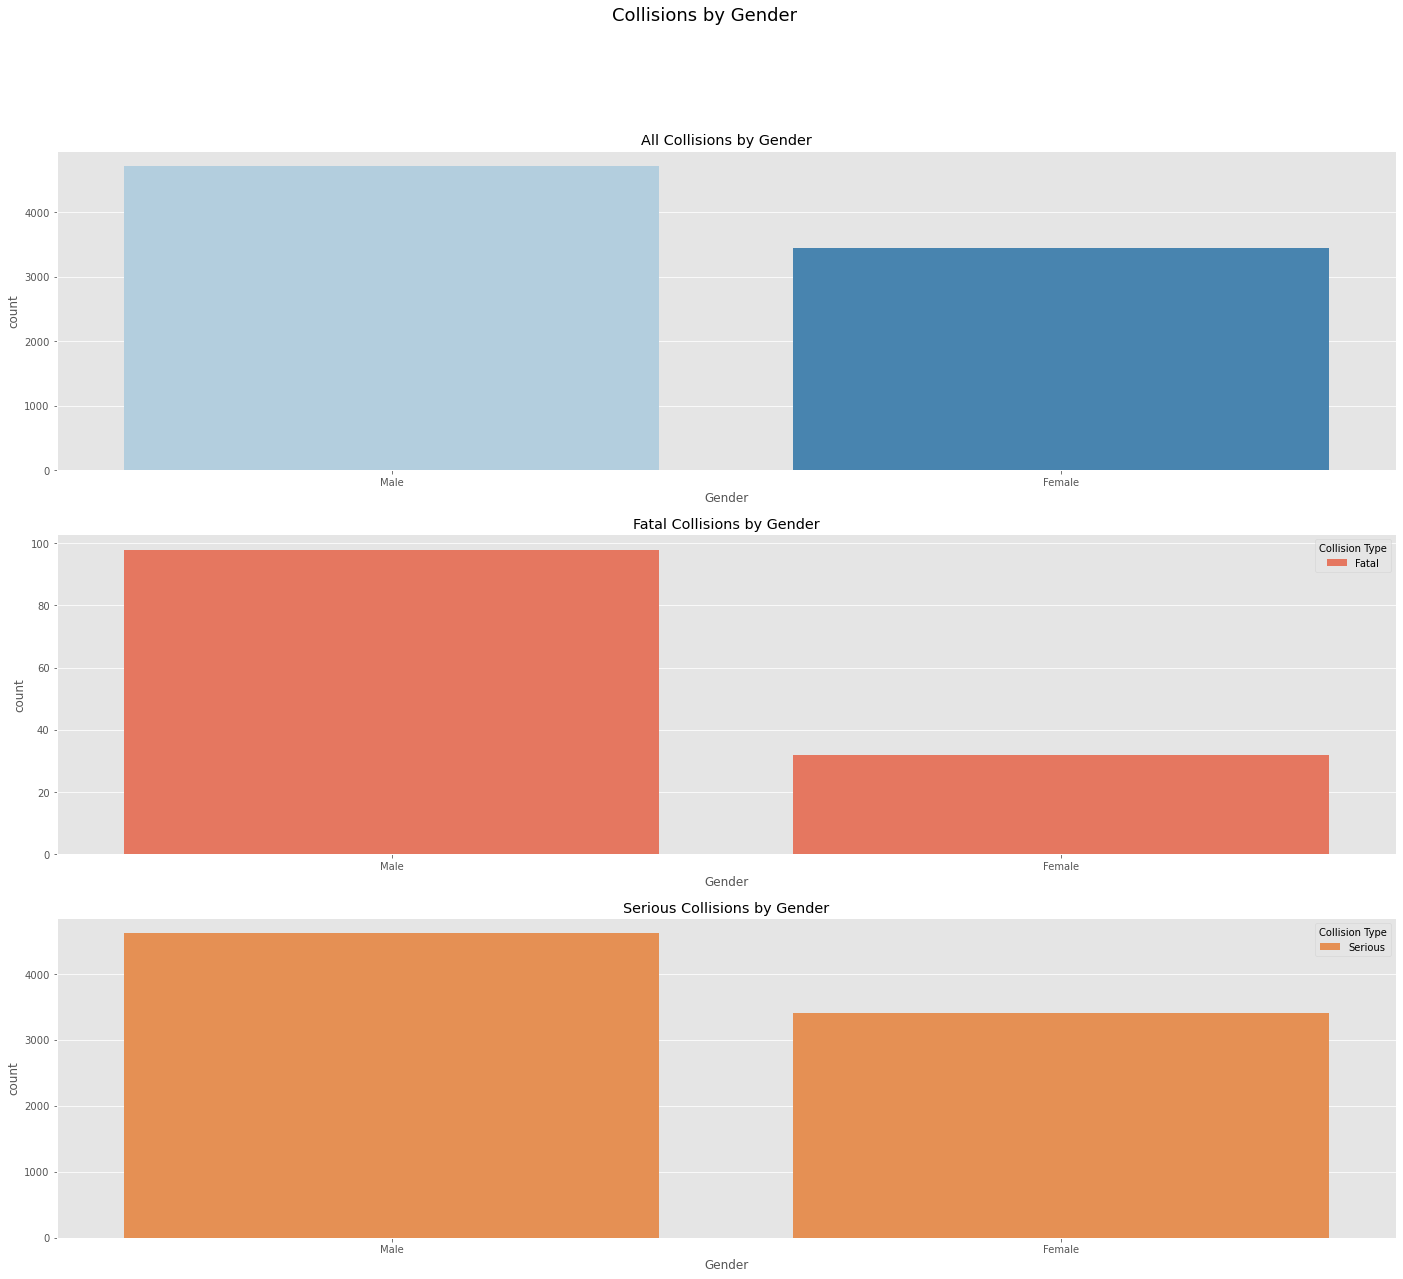

In [76]:
plt.suptitle('Collisions by Gender',fontsize=18)

plt.subplot(3,1,1)
plt.title('All Collisions by Gender')
sns.countplot(x='Gender',data =df,palette='Blues',order=['Male','Female'])

plt.subplot(3,1,2)
plt.title('Fatal Collisions by Gender')
sns.countplot(x='Gender',data =df[df['Collision Type'] == 'Fatal'],hue='Collision Type',palette='Reds',order=['Male','Female'])

plt.subplot(3,1,3)
plt.title('Serious Collisions by Gender')
sns.countplot(x='Gender',data =df[df['Collision Type'] == 'Serious'],hue='Collision Type',palette='Oranges',order=['Male','Female']);

We can observe that there are more males than females invloved in collsions. If we thn look at the difference between collsion type, there are far more males invloved in Fatal Collisions

***

#### Collisions by Age Group <a class="anchor" id="p3"></a>

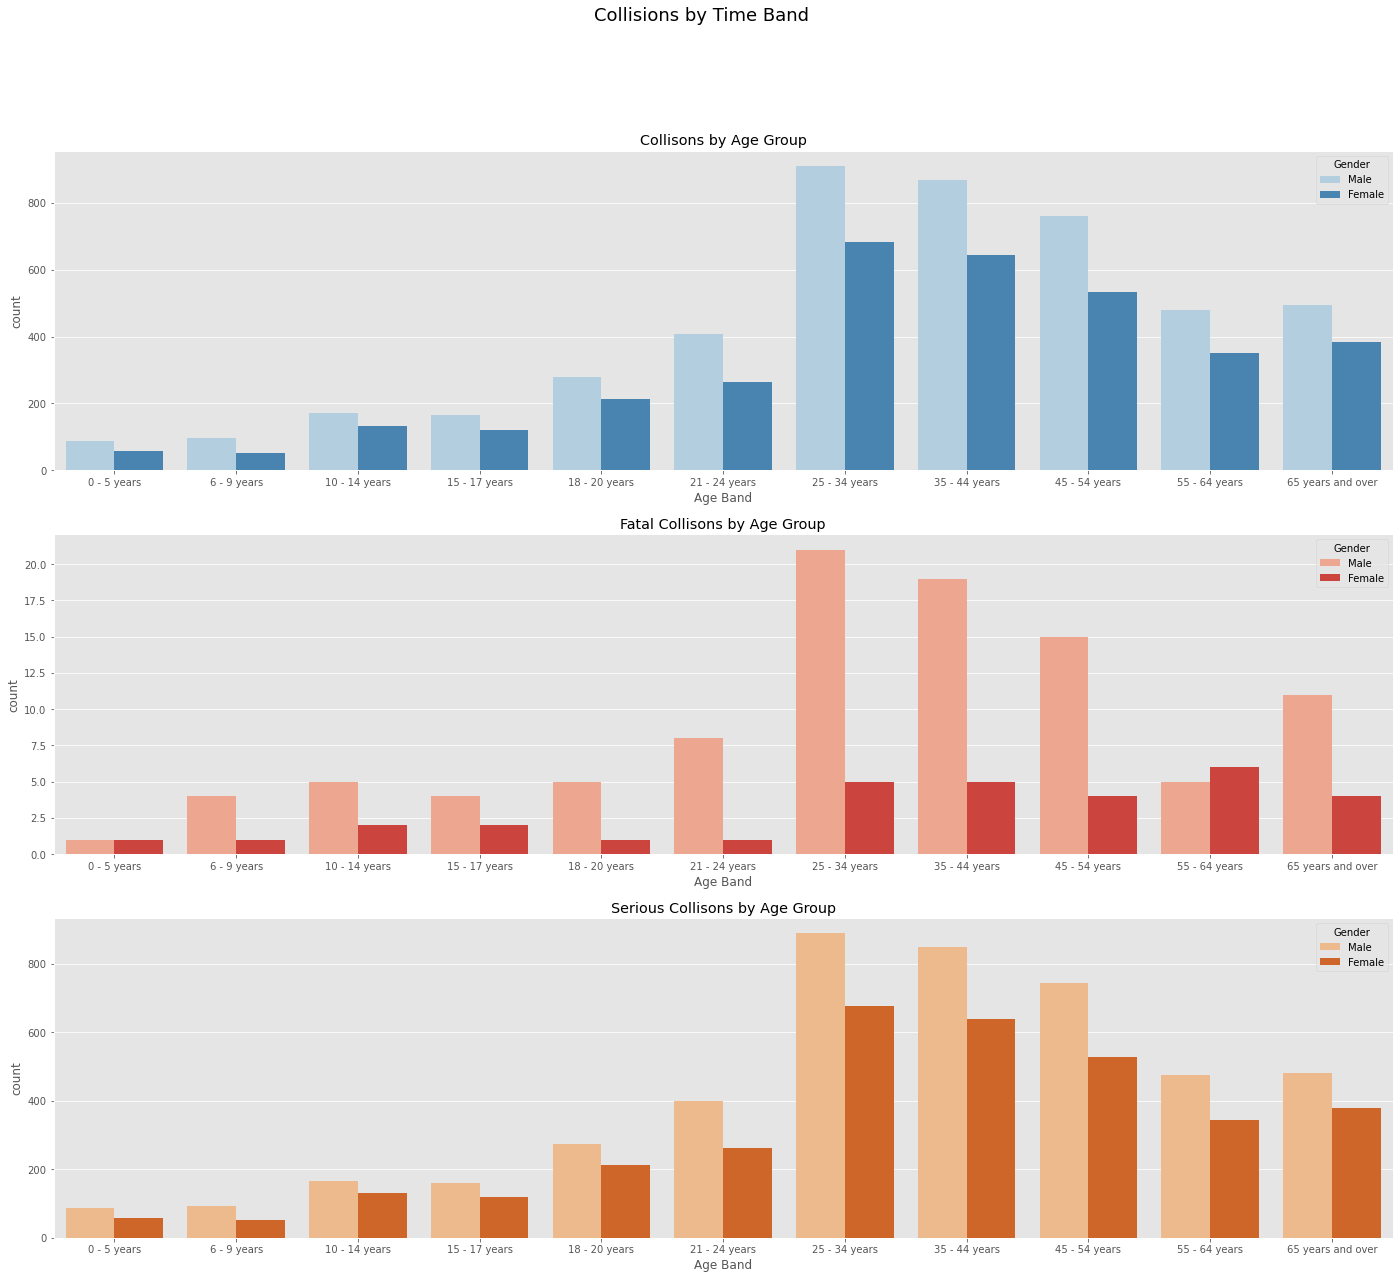

In [77]:
plt.suptitle('Collisions by Time Band',fontsize=18)

plt.subplot(3,1,1)
plt.title('Collisons by Age Group')
sns.countplot(x='Age Band',data =df,hue='Gender',order=age_groups_sorted, palette='Blues' )

plt.subplot(3,1,2)
plt.title('Fatal Collisons by Age Group')
sns.countplot(x='Age Band',data =df[df['Collision Type'] == 'Fatal'],hue='Gender',order=age_groups_sorted, palette='Reds' )

plt.subplot(3,1,3)
plt.title('Serious Collisons by Age Group')
sns.countplot(x='Age Band',data =df[df['Collision Type'] == 'Serious'],hue='Gender',order = age_groups_sorted, palette='Oranges');

The 25-34 year old group has the highest amount of collisions for both genders and collsion type.

***

#### Collisions by Day <a class="anchor" id="p4"></a>

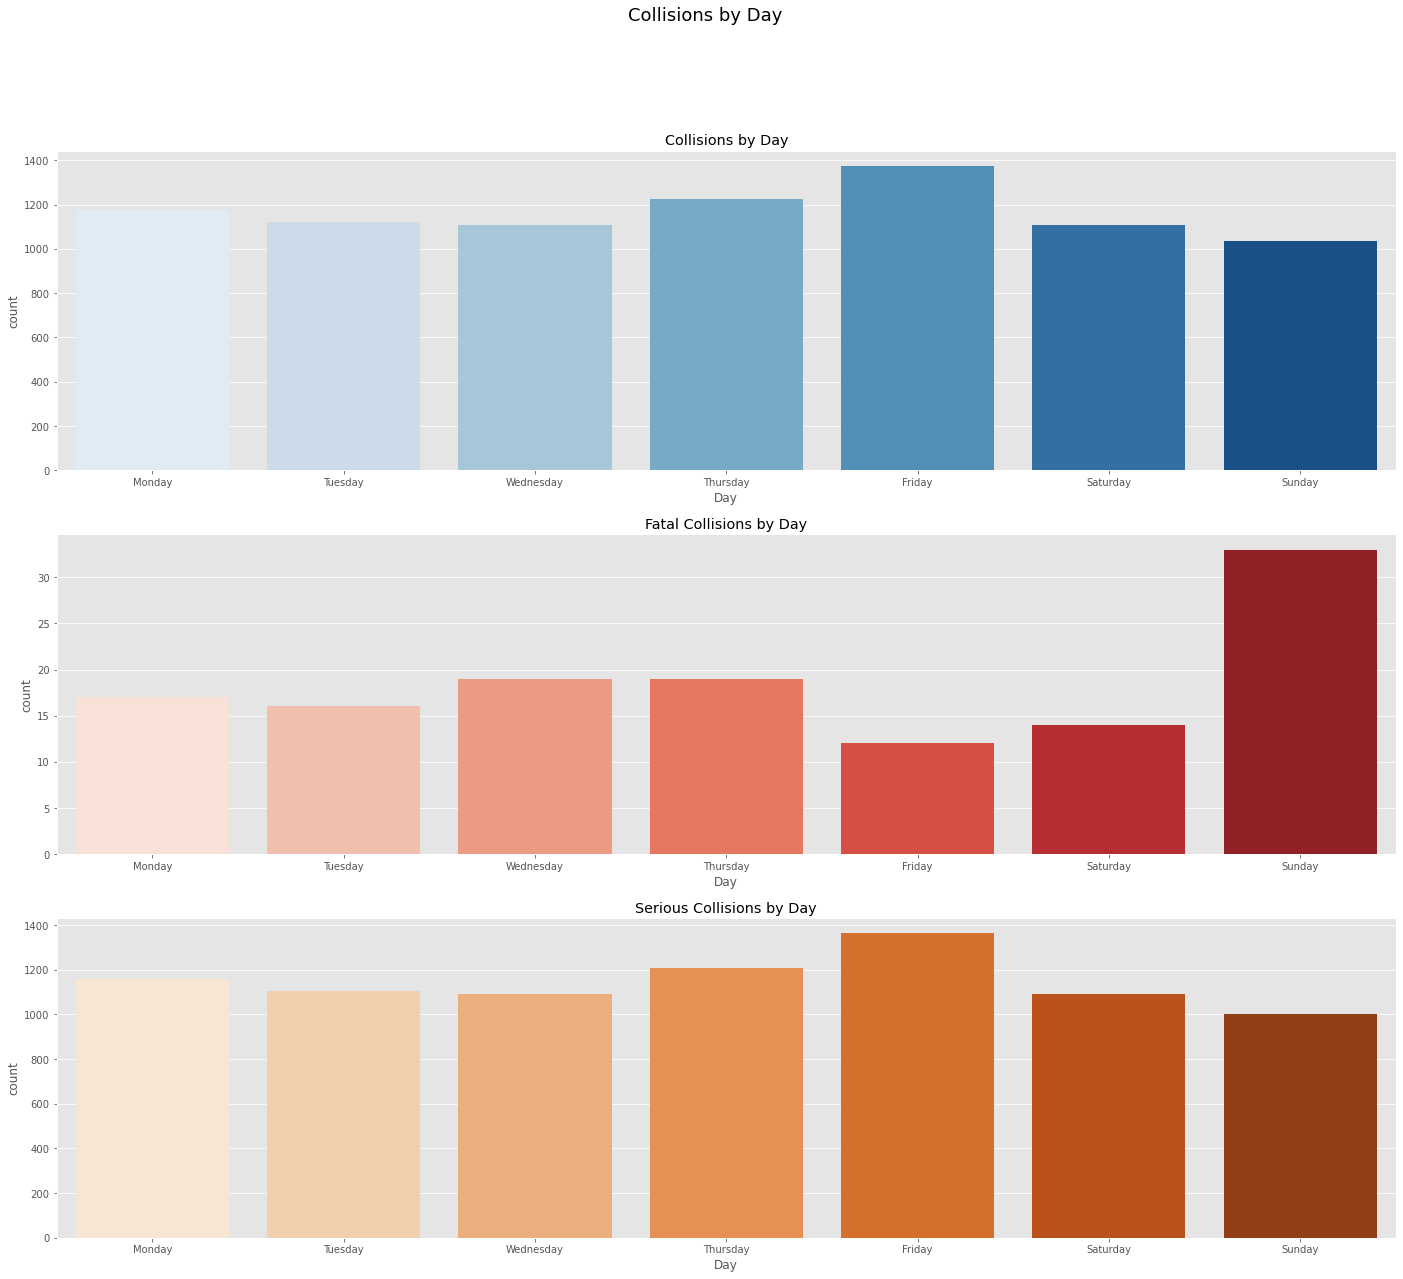

In [78]:
plt.suptitle('Collisions by Day',fontsize=18)

plt.subplot(3,1,1)
plt.title('Collisions by Day')
sns.countplot(x='Day',data =df,order=days, palette='Blues')

plt.subplot(3,1,2)
plt.title('Fatal Collisions by Day')
sns.countplot(x='Day',data =df[df['Collision Type'] == 'Fatal'],order=days, palette='Reds')

plt.subplot(3,1,3)
plt.title('Serious Collisions by Day')
sns.countplot(x='Day',data =df[df['Collision Type'] == 'Serious'],order=days, palette='Oranges');

Sunday's prove to be the deadliest day on the roads in terms of fatalities but overall Friday's see the most collisions occur.

***

#### Collisions by Time Band <a class="anchor" id="p5"></a>

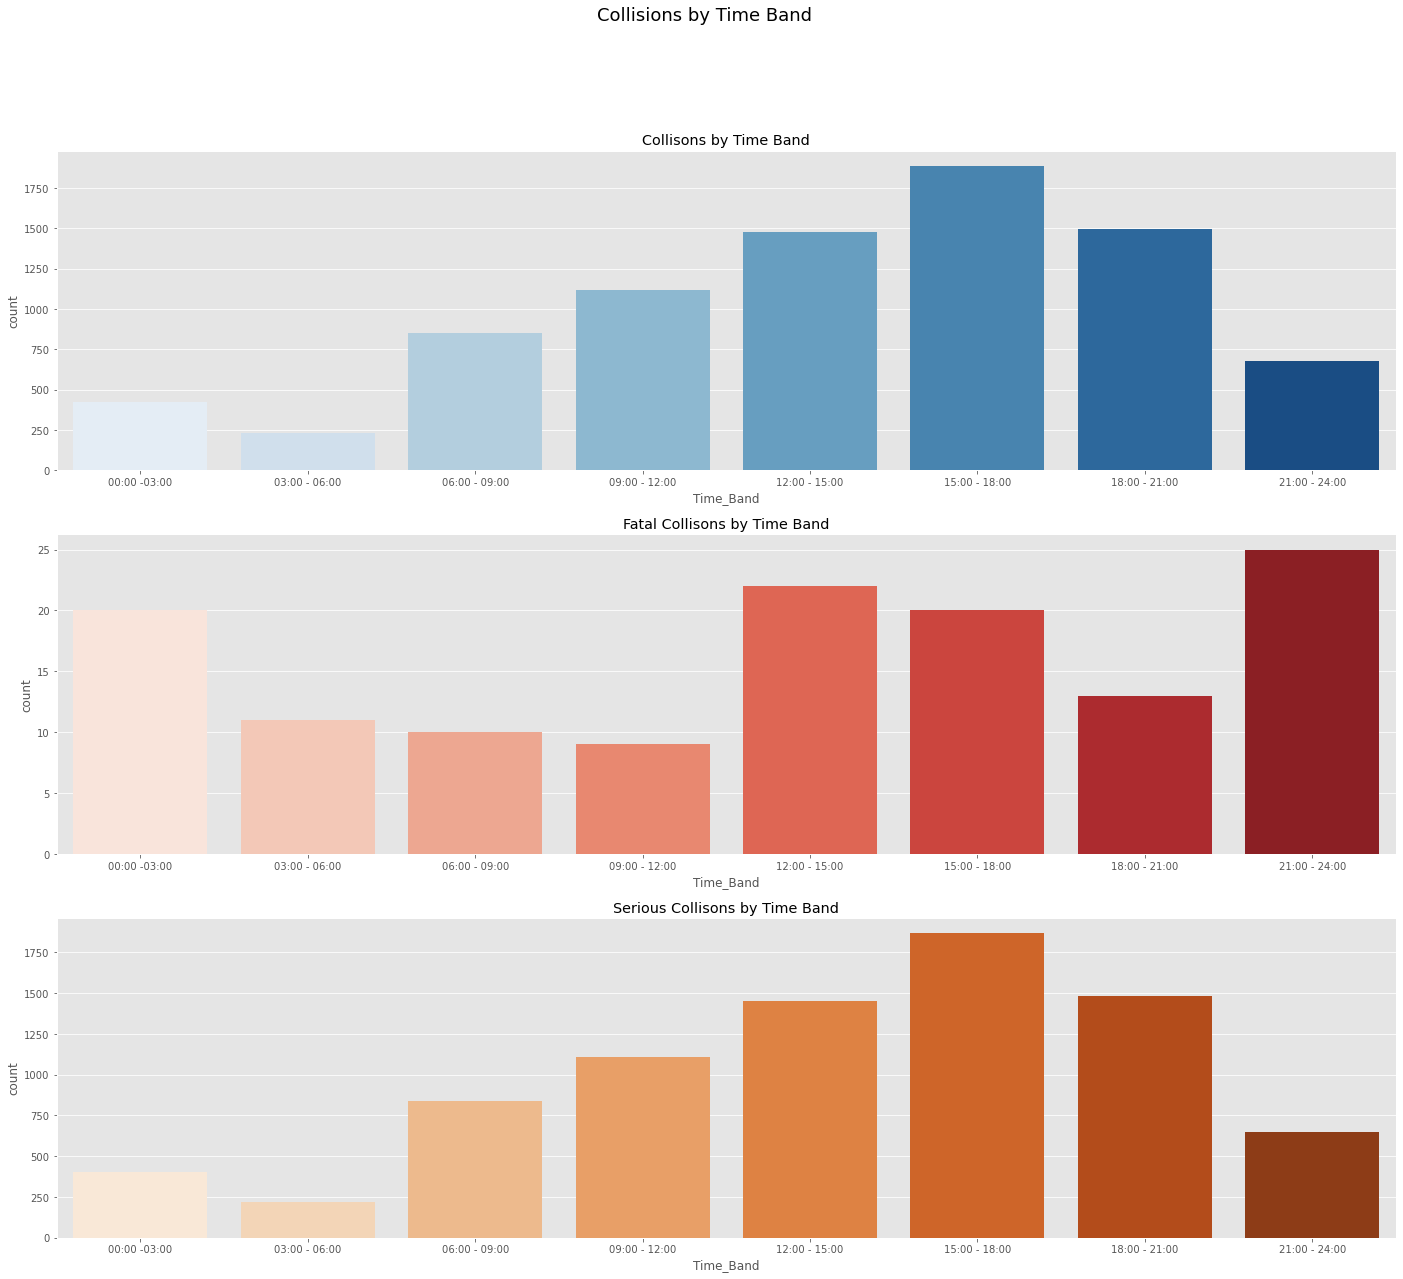

In [80]:
plt.suptitle('Collisions by Time Band',fontsize=18)

plt.subplot(3,1,1)
plt.title('Collisons by Time Band')
sns.countplot(x='Time_Band',data =df,order=time_bands_sorted, palette='Blues' )

plt.subplot(3,1,2)
plt.title('Fatal Collisons by Time Band')
sns.countplot(x='Time_Band',data =df[df['Collision Type'] == 'Fatal'],order=time_bands_sorted, palette='Reds' )

plt.subplot(3,1,3)
plt.title('Serious Collisons by Time Band')
sns.countplot(x='Time_Band',data =df[df['Collision Type'] == 'Serious'],order=time_bands_sorted, palette='Oranges');

12:00 - 15:00 is the time band with the most collisiions. Breaking it down by collision type, the distributiion for each collision type is quite different. 21:00 - 24:00 is on of the highest time bands for fstal collisons but quite low for serious collisons. 

***

#### Collisions by Road User <a class="anchor" id="p6"></a>

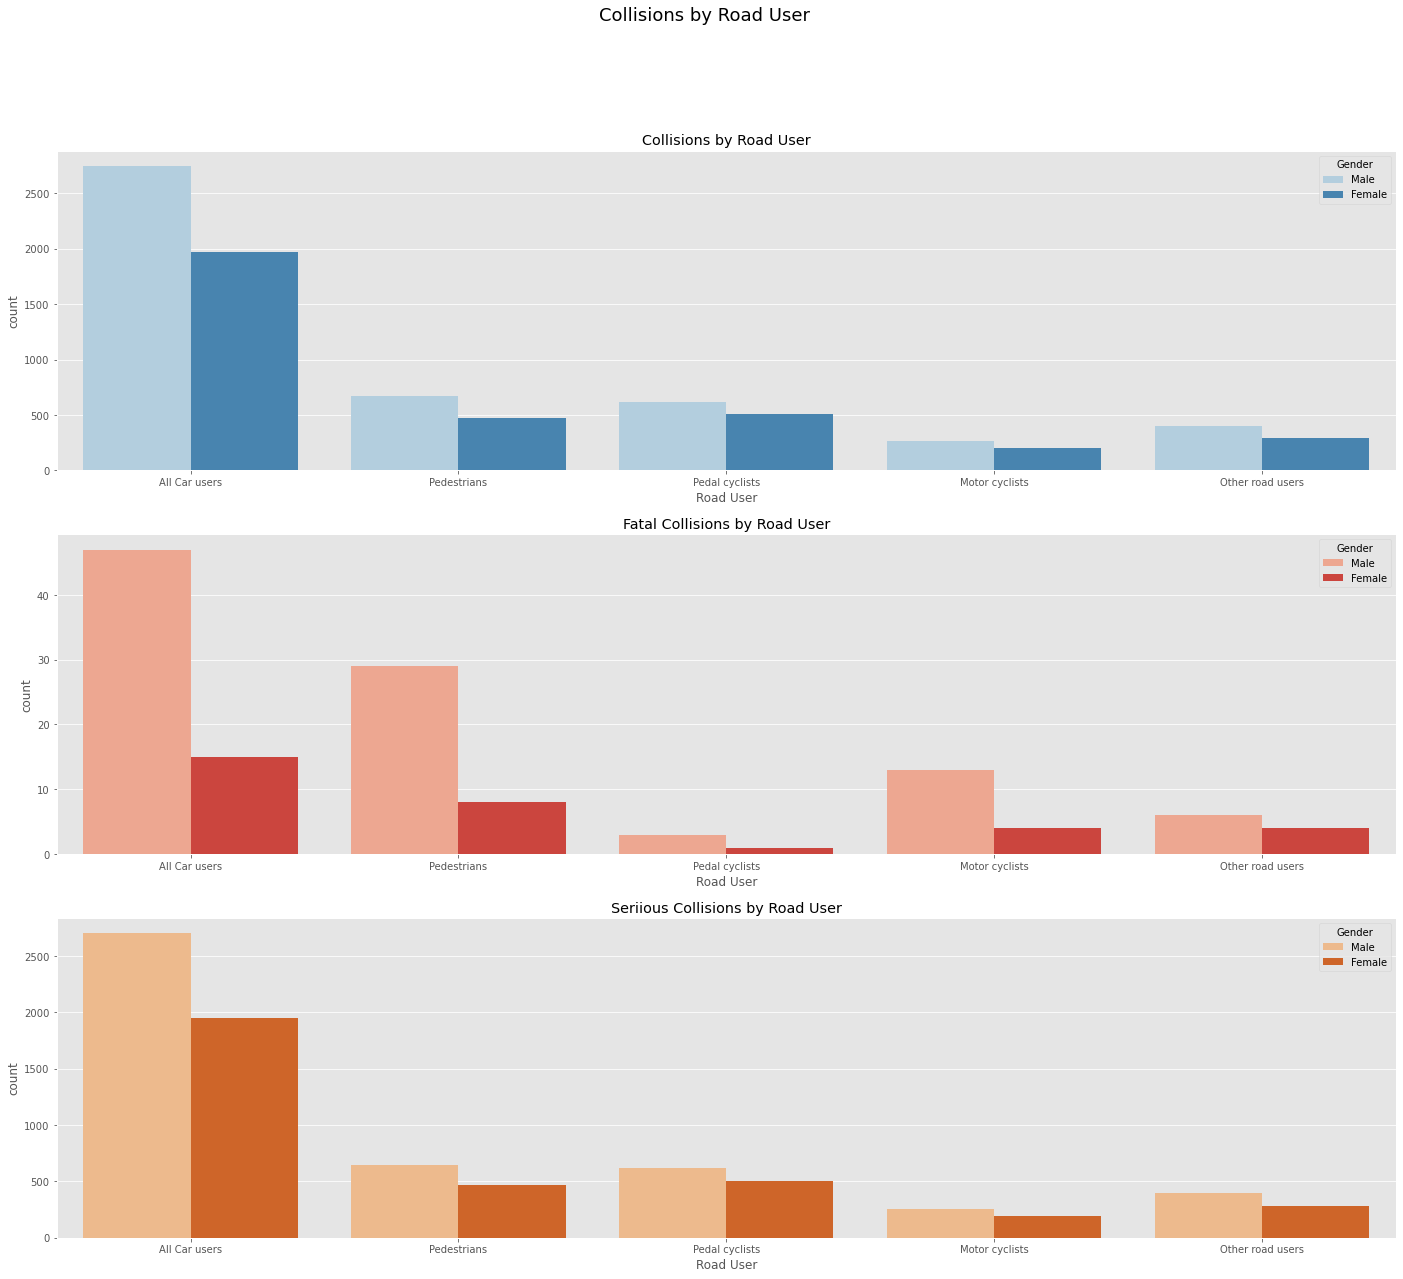

In [81]:
plt.suptitle('Collisions by Road User',fontsize=18)

plt.subplot(3,1,1)
plt.title('Collisions by Road User')
sns.countplot(x='Road User',data =df, palette='Blues',hue='Gender',order=road_user_sort)

plt.subplot(3,1,2)
plt.title('Fatal Collisions by Road User')
sns.countplot(x='Road User',data =df[df['Collision Type'] == 'Fatal'], palette='Reds',hue='Gender',order=road_user_sort )

plt.subplot(3,1,3)
plt.title('Seriious Collisions by Road User')
sns.countplot(x='Road User',data =df[df['Collision Type'] == 'Serious'], palette='Oranges',hue='Gender',order=road_user_sort);

Unsuprisingly, car users are by far the biggest group involved in road collisions. However, looking at fatalities, pedestrians numbers are also quite high. 

***

### Aggregations by Date <a class="anchor" id="agg1"></a>

We will create a new dataset based on collsion aggregations by date. We will also apply extra research data such as:

* Fixed Charged Notices
* Traffic data

***

#### Research data <a class="anchor" id="agg2"></a>

* FCN (fixed charged notices)
* Traffic

We will look at the distributions for each data type. The mean and stanard deviation will be calculated and plotted using numpys *normal* distribution function

In [82]:
#fixed charged notices data for 2018
fcn_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/FCN_2018.csv')

#trffic data from annual transport omnibus
traffic_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/Traffic.csv')

In [83]:
#month lengths to calculate averages based on month
month_len = [31,28,31,30,31,30,31,31,30,31,30,31]

#adding columns to fcn dataset

#dayy in month
fcn_df['Days']= month_len

#averages
fcn_df['Average_DI_per_day'] = fcn_df['Driving_Intoxicated']/fcn_df['Days']
fcn_df['Average_MP_per_day'] = fcn_df['Mobile_Phones']/fcn_df['Days']
fcn_df['Average_SP_per_day'] = fcn_df['Speeding']/fcn_df['Days']

#overview of dataset
fcn_df.describe()

,Driving_Intoxicated,Mobile_Phones,Speeding,Days,Average_DI_per_day,Average_MP_per_day,Average_SP_per_day
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,647.000000,2597.833333,11343.500000,30.416667,21.266711,85.427119,372.463185
std,66.589652,568.033583,1973.227513,0.900337,2.062877,18.508645,61.199906
min,511.000000,1888.000000,7948.000000,28.000000,16.483871,60.903226,265.677419
25%,631.750000,2187.500000,10686.500000,30.000000,20.379032,72.887097,356.939286
50%,664.000000,2463.000000,12065.500000,31.000000,22.133333,80.676344,398.222581
75%,693.750000,3019.000000,12454.750000,31.000000,22.451613,99.033871,407.513710
max,705.000000,3588.000000,13593.000000,31.000000,23.500000,115.741935,438.483871


In [84]:
#ref https://stackoverflow.com/questions/24984178/different-std-in-pandas-vs-numpy

#average for daily DUI
dui_daily_mean = np.round(np.mean(fcn_df['Average_DI_per_day']))

#standard deviation for daily DUI
dui_daily_std = np.round(np.std(fcn_df['Average_DI_per_day'],ddof=1))

#average for daily mobile phone
mp_daily_mean = np.mean(fcn_df['Average_MP_per_day'])

#standard deviation for daily mobile phone
mp_daily_std = np.std(fcn_df['Average_MP_per_day'],ddof=1)

#average for daily speeding
sp_daily_mean = np.mean(fcn_df['Average_SP_per_day'])

#standard deviation for daily speeding
sp_daily_std = np.std(fcn_df['Average_SP_per_day'],ddof=1)

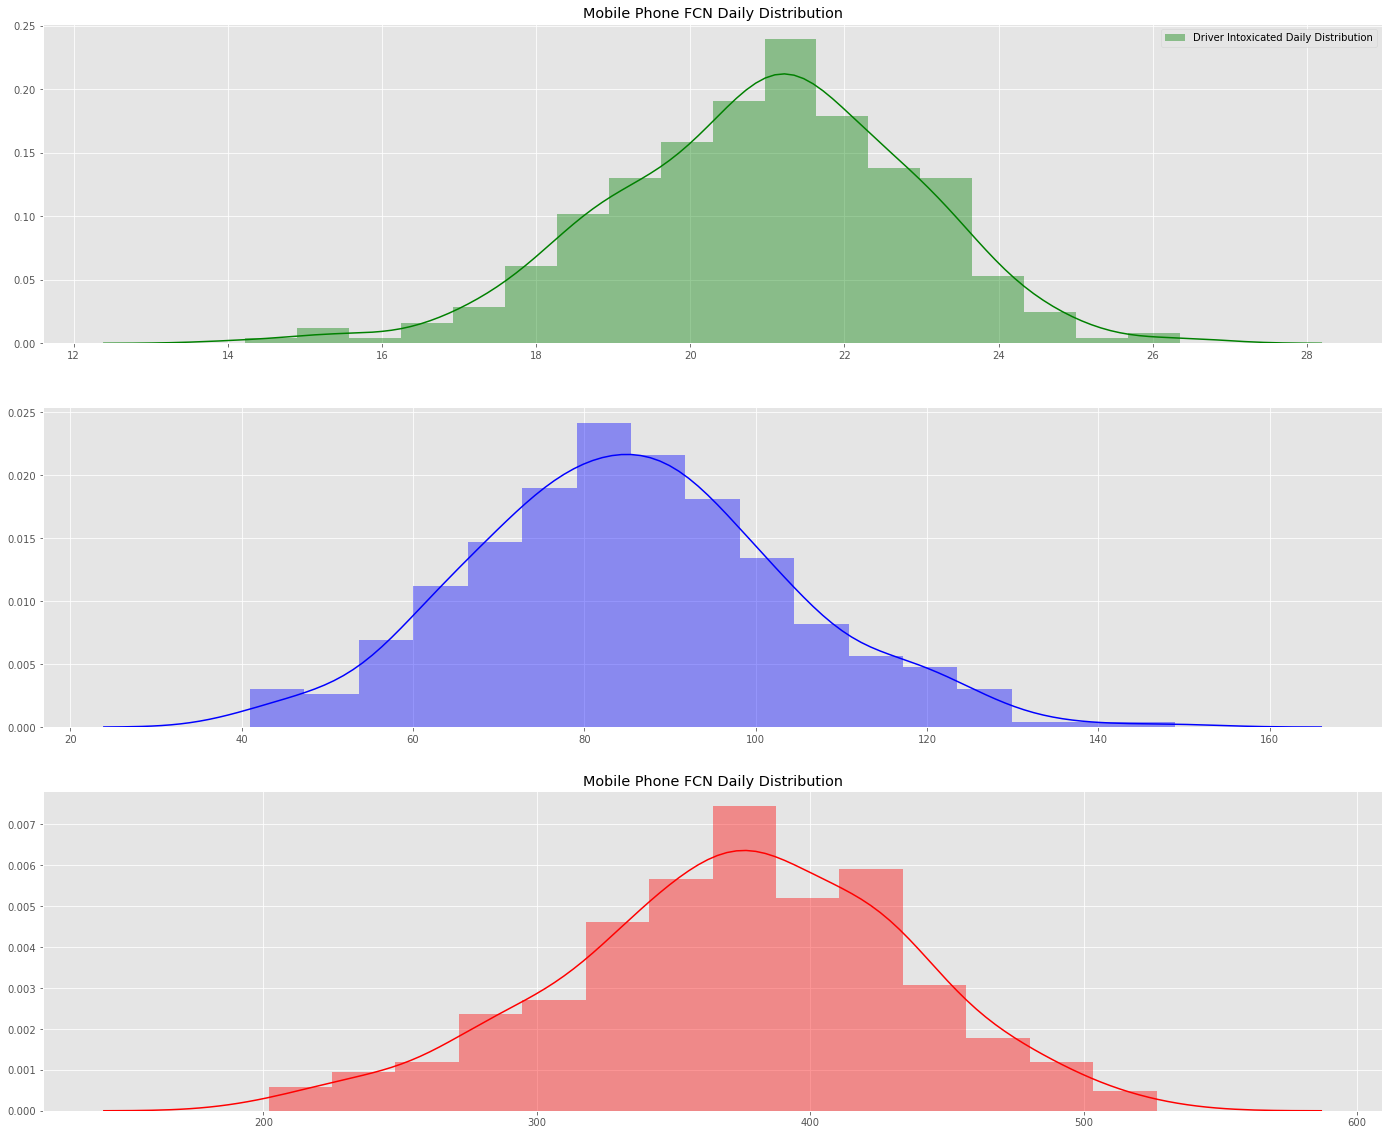

In [85]:
plt.subplot(3,1,1)
plt.title('Driver Intoxicated Daily Distribution')
sns.distplot(rng.normal(dui_daily_mean,dui_daily_std,365),label = 'Driver Intoxicated Daily Distribution',color='Green')
plt.legend()

plt.title('Mobile Phone FCN Daily Distribution')
plt.subplot(3,1,2)
sns.distplot(rng.normal(mp_daily_mean,mp_daily_std,365),label = 'Mobile Phone FCN Daily Distribution',color='Blue')

plt.subplot(3,1,3)
plt.title('Mobile Phone FCN Daily Distribution')
sns.distplot(rng.normal(sp_daily_mean,sp_daily_std,365),label = 'Driver Intoxicated Daily Distribution',color='Red');


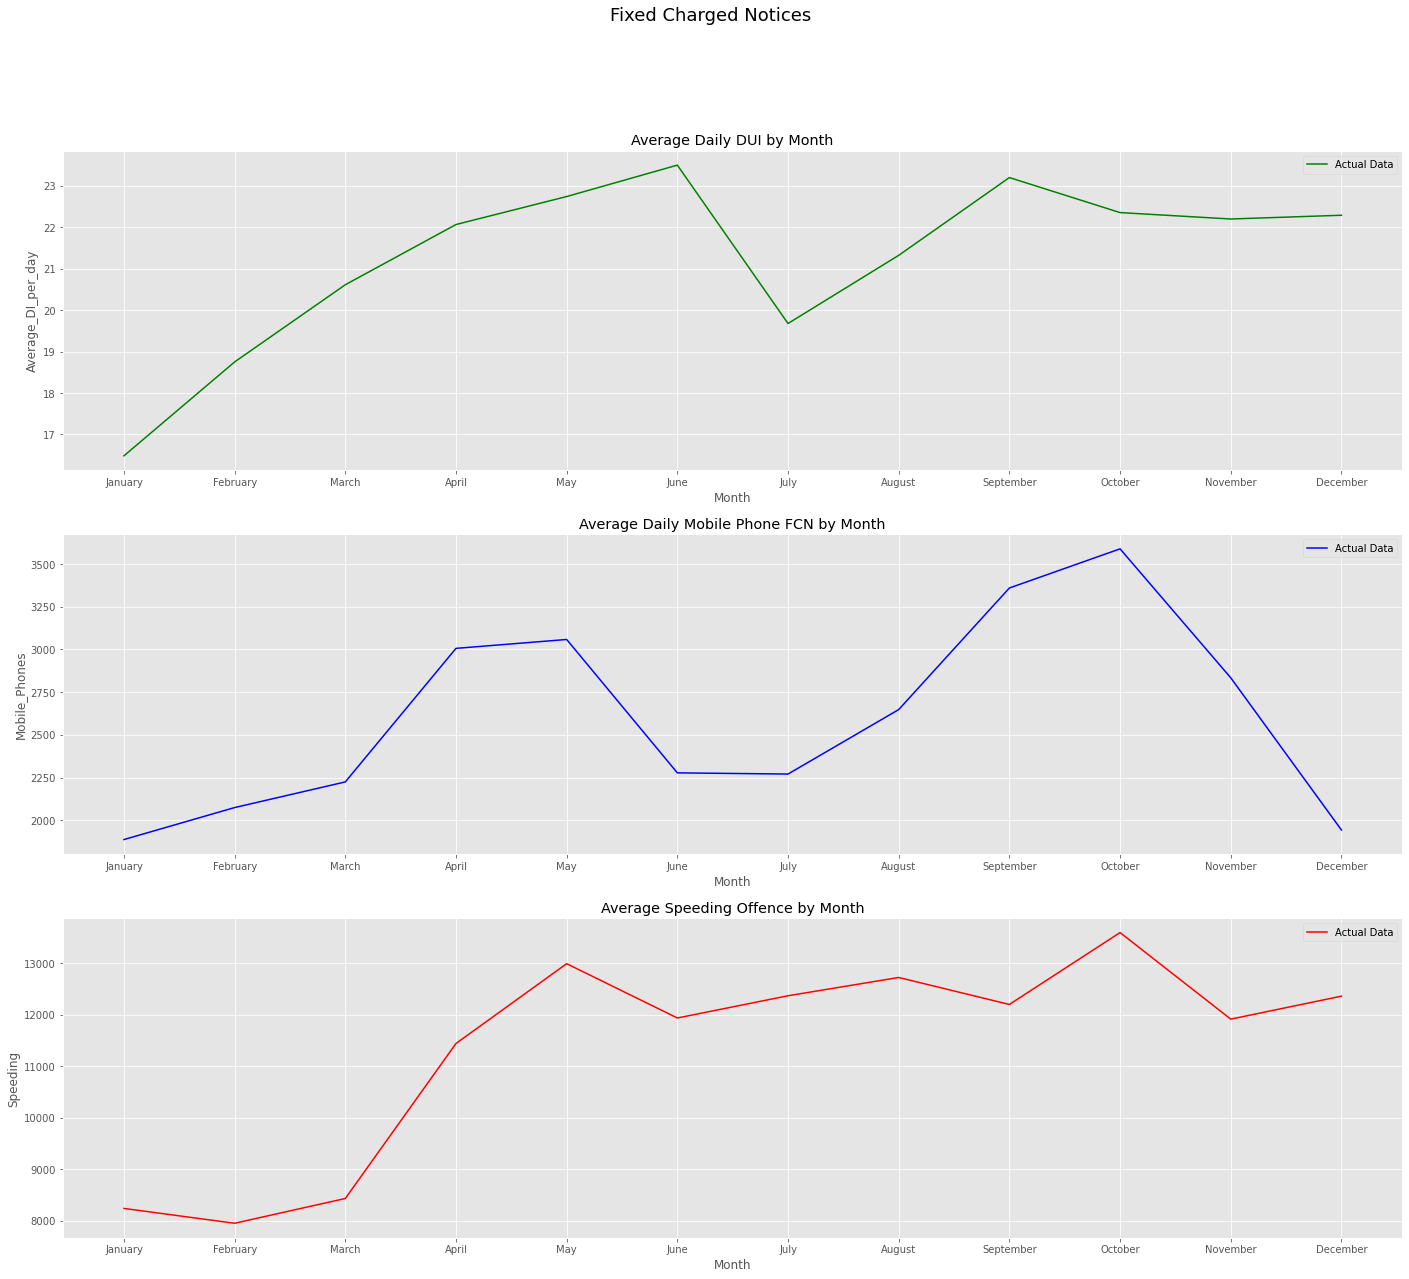

In [86]:
plt.suptitle('Fixed Charged Notices',fontsize=18)

plt.subplot(3,1,1)
plt.title('Average Daily DUI by Month')
sns.lineplot(x='Month',y='Average_DI_per_day',data=fcn_df,color='g',label='Actual Data',sort=False)

plt.subplot(3,1,2)
plt.title('Average Daily Mobile Phone FCN by Month')
sns.lineplot(x='Month',y='Mobile_Phones',data=fcn_df,color='b',label='Actual Data',sort=False)

plt.subplot(3,1,3)
plt.title('Average Speeding Offence by Month')
sns.lineplot(x='Month',y='Speeding',data=fcn_df,color='r',label='Actual Data',sort=False);

In [87]:
#averages by month for Driving intoxicated, Speeding and Mobile Phone usage
fcn_dui_monthly_average = fcn_df['Average_DI_per_day']
fcn_mp_monthly_average = fcn_df['Average_MP_per_day']
fcn_sp_monthly_average = fcn_df['Average_SP_per_day']

In [88]:
#adding day length to dataset
traffic_df['Days']= month_len

#adding averages 
traffic_df['Average_Vehicles_per_day'] = traffic_df['Vehicles']/traffic_df['Days']
traffic_df['Average_KM_per_Mill_per_day'] = (traffic_df['Km_Driven_millions']/traffic_df['Days'])
traffic_df

,Month,Year,Vehicles,Km_Driven_millions,Average_km,Days,Average_Vehicles_per_day,Average_KM_per_Mill_per_day
0,January,2018,2709094,3619,1240,31,87390.129032,116.741935
1,February,2018,2722678,3466,1200,28,97238.500000,123.785714
2,March,2018,2726732,3696,1289,31,87959.096774,119.225806
3,April,2018,2730663,3943,1383,30,91022.100000,131.433333
4,May,2018,2730669,4269,1502,31,88086.096774,137.709677
5,June,2018,2724633,4102,1446,30,90821.100000,136.733333
6,July,2018,2729520,4259,1499,31,88049.032258,137.387097
7,August,2018,2736592,4284,1501,31,88277.161290,138.193548
8,September,2018,2737147,4034,1407,30,91238.233333,134.466667
9,October,2018,2735993,4164,1445,31,88257.838710,134.322581


In [89]:
# average for vehicles per day
vehicles_daily_mean = np.round(np.mean(traffic_df['Average_Vehicles_per_day']))

#standard deviation for vehicles per day
vehicles_daily_std = np.round(np.std(traffic_df['Average_Vehicles_per_day'],ddof=1))

# average for km's driven per day
kmmill_daily_mean = np.mean(traffic_df['Average_KM_per_Mill_per_day'])

#standard deviation for km's driven per day
kmmill_daily_std = np.std(traffic_df['Average_KM_per_Mill_per_day'],ddof=1)


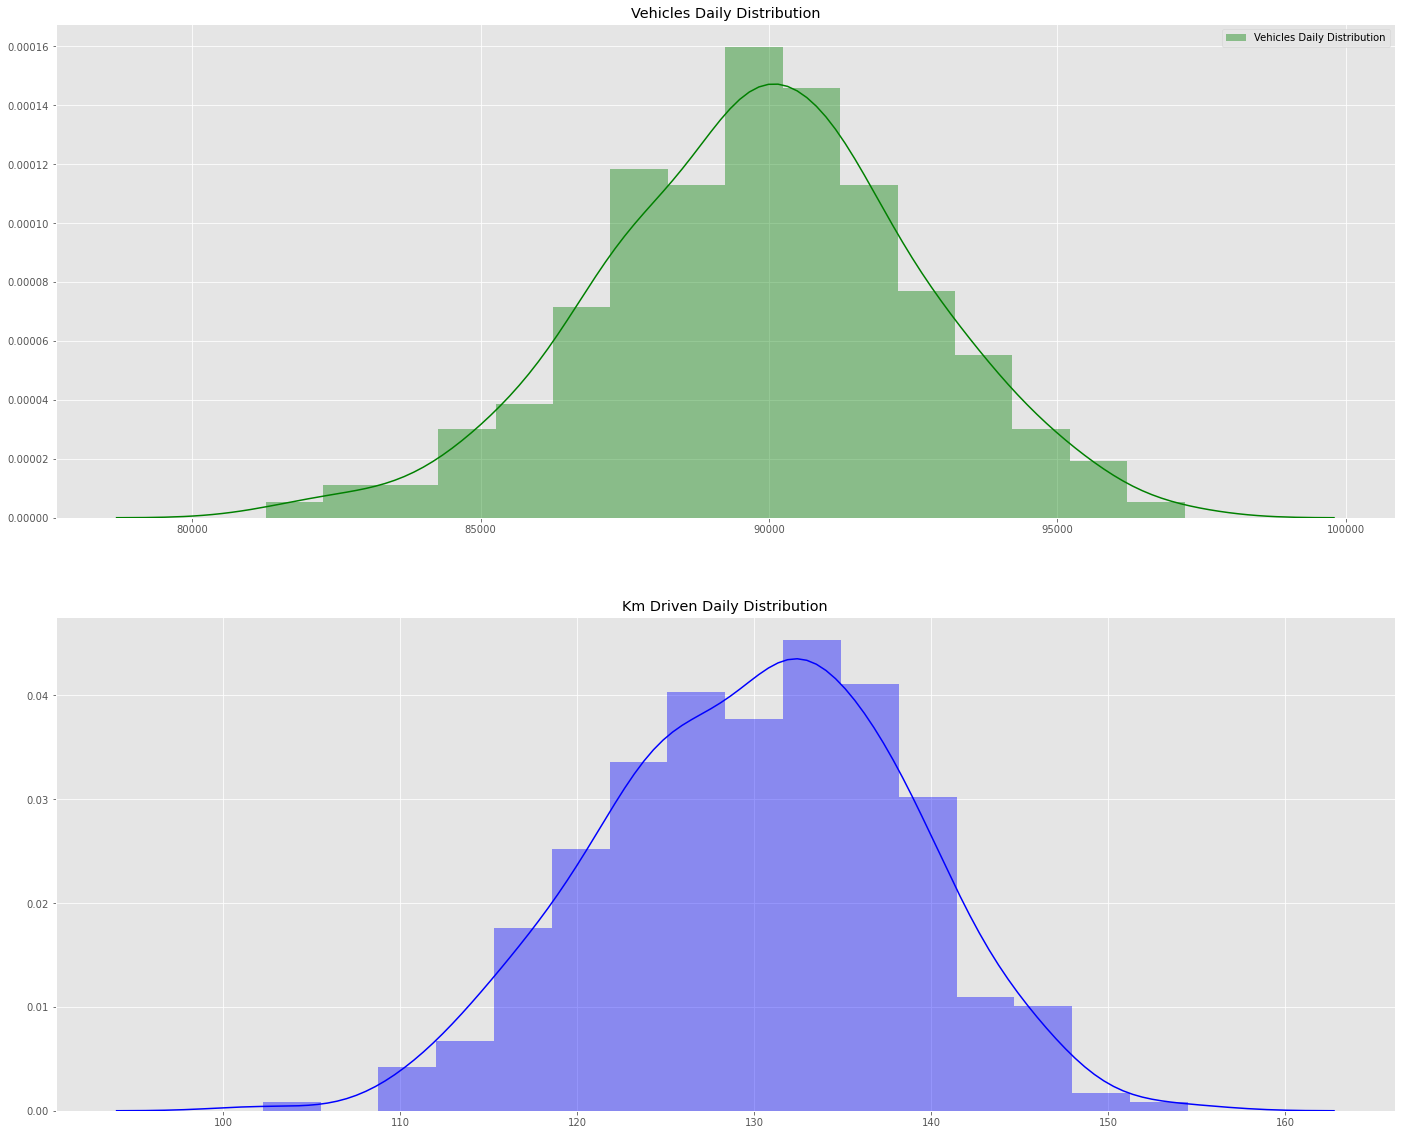

In [90]:
plt.subplot(2,1,1)
plt.title('Vehicles Daily Distribution')
sns.distplot(rng.normal(vehicles_daily_mean,vehicles_daily_std,365),label = 'Vehicles Daily Distribution',color='Green')
plt.legend()

plt.subplot(2,1,2)
plt.title('Km Driven Daily Distribution')
sns.distplot(rng.normal(kmmill_daily_mean,kmmill_daily_std,365),label = 'KM Driven Daily Distribution',color='Blue');

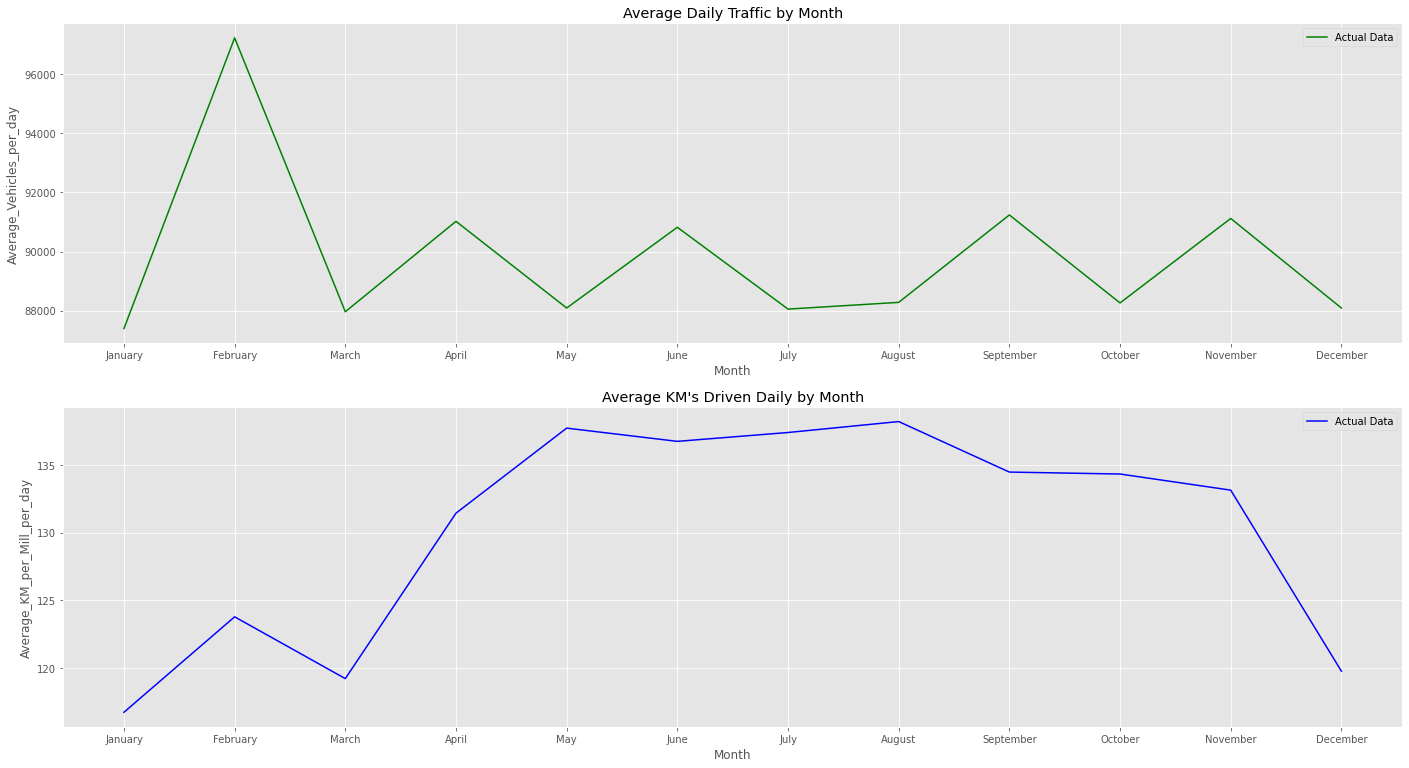

In [91]:
plt.subplot(3,1,1)
plt.title('Average Daily Traffic by Month')
sns.lineplot(x='Month',y='Average_Vehicles_per_day',data=traffic_df,color='g',label='Actual Data',sort=False)

plt.subplot(3,1,2)
plt.title("Average KM's Driven Daily by Month")
sns.lineplot(x='Month',y='Average_KM_per_Mill_per_day',data=traffic_df,color='b',label='Actual Data',sort=False);


In [92]:
#daily average by month for traffic and km's driven
traffic_daily_average = traffic_df['Average_Vehicles_per_day']
traffic_km_driven_average = traffic_df['Average_KM_per_Mill_per_day']

***

#### Summary Dataset <a class="anchor" id="agg3"></a>

Collisions are aggregated by data for all collsions and for both collsion types. 

Day name and Month name are also added using the *dt.day_name* and *dt.month_name* funtions from Pandas

In [93]:
#summary dataset based on unique dates
summary_df = pd.DataFrame(df.Date.unique(),index=df.Date.unique(),columns=['Date'])
summary_df.index.name == 'Date'
summary_df = summary_df.sort_index()

In [94]:
#day name
summary_df['Day'] = summary_df['Date'].dt.day_name()

#month name
summary_df['Month'] = summary_df['Date'].dt.month_name()

#all collisions
summary_df['Collisions'] = df['Collision Type'].groupby(df['Date']).agg('count')
summary_df.head(12)

,Date,Day,Month,Collisions
2018-01-01,2018-01-01,Monday,January,14
2018-01-02,2018-01-02,Tuesday,January,19
2018-01-03,2018-01-03,Wednesday,January,16
2018-01-04,2018-01-04,Thursday,January,29
2018-01-05,2018-01-05,Friday,January,16
2018-01-06,2018-01-06,Saturday,January,18
2018-01-07,2018-01-07,Sunday,January,27
2018-01-08,2018-01-08,Monday,January,24
2018-01-09,2018-01-09,Tuesday,January,18
2018-01-10,2018-01-10,Wednesday,January,22


In [95]:
#ref https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/

#adding number of fatals by date
summary_fatals = df[df['Collision Type']=='Fatal'].groupby('Date')['Collision Type'].count().to_frame()
summary_df['Fatals'] = summary_fatals

#replacing nan values with 0 where applicable
summary_df['Fatals']  = summary_df['Fatals'].fillna(0)

summary_serious = df[df['Collision Type']=='Serious'].groupby('Date')['Collision Type'].count().to_frame()
summary_df['Serious'] = summary_serious
summary_df

#check that collsions == fatal + serious
print('Total Collisons - (Total Fatal + Total Serious) = 0: ',sum(summary_df['Fatals']) + sum(summary_df['Serious']) == sum(summary_df['Collisions']))

Total Collisons - (Total Fatal + Total Serious) = 0:  True


The remaining columns will be created applying a poisson distribtution using the relevant monthly average for each data type.

#### DUI Distribtution

In [96]:
#applying poisson dostributin by month for dui
jan_dui = rng.poisson(fcn_dui_monthly_average[0],365)
feb_dui = rng.poisson(fcn_dui_monthly_average[1],365)
mar_dui = rng.poisson(fcn_dui_monthly_average[2],365)
apr_dui = rng.poisson(fcn_dui_monthly_average[3],365)
may_dui = rng.poisson(fcn_dui_monthly_average[4],365)
june_dui = rng.poisson(fcn_dui_monthly_average[5],365)
july_dui = rng.poisson(fcn_dui_monthly_average[6],365)
aug_dui = rng.poisson(fcn_dui_monthly_average[7],365)
sept_dui = rng.poisson(fcn_dui_monthly_average[8],365)
oct_dui = rng.poisson(fcn_dui_monthly_average[9],365)
nov_dui = rng.poisson(fcn_dui_monthly_average[10],365)
dec_dui = rng.poisson(fcn_dui_monthly_average[11],365)

In [97]:
# adding olumn to summary dataset
# np.where used to apply condtions based on month
summary_df['DUI'] = np.where(summary_df['Month']== 'January', jan_dui,
                             np.where(summary_df['Month']== 'February', feb_dui,
                                      np.where(summary_df['Month']== 'March', mar_dui,
                                               np.where(summary_df['Month']== 'April', apr_dui,
                                                        np.where(summary_df['Month']== 'May', may_dui,
                                                                 np.where(summary_df['Month']== 'June', june_dui,
                                                                          np.where(summary_df['Month']== 'July', july_dui,
                                                                                   np.where(summary_df['Month']== 'August', aug_dui,
                                                                                            np.where(summary_df['Month']== 'September', sept_dui,
                                                                                                     np.where(summary_df['Month']== 'October', oct_dui,
                                                                                                              np.where(summary_df['Month']== 'November', nov_dui,
                                                                                                                       dec_dui)))))))))))


#### Mobile Phone Distribution

In [98]:
#applying poisson dostributin by month for mobile phone
jan_mp = rng.poisson(fcn_mp_monthly_average[0],365)
feb_mp = rng.poisson(fcn_mp_monthly_average[1],365)
mar_mp = rng.poisson(fcn_mp_monthly_average[2],365)
apr_mp = rng.poisson(fcn_mp_monthly_average[3],365)
may_mp = rng.poisson(fcn_mp_monthly_average[4],365)
june_mp = rng.poisson(fcn_mp_monthly_average[5],365)
july_mp = rng.poisson(fcn_mp_monthly_average[6],365)
aug_mp = rng.poisson(fcn_mp_monthly_average[7],365)
sept_mp = rng.poisson(fcn_mp_monthly_average[8],365)
oct_mp = rng.poisson(fcn_mp_monthly_average[9],365)
nov_mp = rng.poisson(fcn_mp_monthly_average[10],365)
dec_mp = rng.poisson(fcn_mp_monthly_average[11],365)

In [99]:
# adding olumn to summary dataset
# np.where used to apply condtions based on month
summary_df['Mobile Phone'] = np.where(summary_df['Month']== 'January', jan_mp,
                             np.where(summary_df['Month']== 'February', feb_mp,
                                      np.where(summary_df['Month']== 'March', mar_mp,
                                               np.where(summary_df['Month']== 'April', apr_mp,
                                                        np.where(summary_df['Month']== 'May', may_mp,
                                                                 np.where(summary_df['Month']== 'June', june_mp,
                                                                          np.where(summary_df['Month']== 'July', july_mp,
                                                                                   np.where(summary_df['Month']== 'August', aug_mp,
                                                                                            np.where(summary_df['Month']== 'September', sept_mp,
                                                                                                     np.where(summary_df['Month']== 'October', oct_mp,
                                                                                                              np.where(summary_df['Month']== 'November', nov_mp,
                                                                                                                       dec_mp)))))))))))


#### Speeding Offence Distribution

In [100]:
#applying poisson dostributin by month for speeding
jan_sp = rng.poisson(fcn_sp_monthly_average[0],365)
feb_sp = rng.poisson(fcn_sp_monthly_average[1],365)
mar_sp = rng.poisson(fcn_sp_monthly_average[2],365)
apr_sp = rng.poisson(fcn_sp_monthly_average[3],365)
may_sp = rng.poisson(fcn_sp_monthly_average[4],365)
june_sp = rng.poisson(fcn_sp_monthly_average[5],365)
july_sp = rng.poisson(fcn_sp_monthly_average[6],365)
aug_sp = rng.poisson(fcn_sp_monthly_average[7],365)
sept_sp = rng.poisson(fcn_sp_monthly_average[8],365)
oct_sp = rng.poisson(fcn_sp_monthly_average[9],365)
nov_sp = rng.poisson(fcn_sp_monthly_average[10],365)
dec_sp = rng.poisson(fcn_sp_monthly_average[11],365)

In [101]:
# adding olumn to summary dataset
# np.where used to apply condtions based on month
summary_df['Speeding'] = np.where(summary_df['Month']== 'January', jan_sp,
                             np.where(summary_df['Month']== 'February', feb_sp,
                                      np.where(summary_df['Month']== 'March', mar_sp,
                                               np.where(summary_df['Month']== 'April', apr_sp,
                                                        np.where(summary_df['Month']== 'May', may_sp,
                                                                 np.where(summary_df['Month']== 'June', june_sp,
                                                                          np.where(summary_df['Month']== 'July', july_sp,
                                                                                   np.where(summary_df['Month']== 'August', aug_sp,
                                                                                            np.where(summary_df['Month']== 'September', sept_sp,
                                                                                                     np.where(summary_df['Month']== 'October', oct_sp,
                                                                                                              np.where(summary_df['Month']== 'November', nov_sp,
                                                                                                                       dec_sp)))))))))))

#### Daily Traffic

In [102]:
#applying poisson dostributin by month for mobile phone
jan_traffic = rng.poisson(traffic_daily_average[0],365)
feb_traffic = rng.poisson(traffic_daily_average[1],365)
mar_traffic = rng.poisson(traffic_daily_average[2],365)
apr_traffic = rng.poisson(traffic_daily_average[3],365)
may_traffic = rng.poisson(traffic_daily_average[4],365)
june_traffic = rng.poisson(traffic_daily_average[5],365)
july_traffic = rng.poisson(traffic_daily_average[6],365)
aug_traffic = rng.poisson(traffic_daily_average[7],365)
sept_traffic = rng.poisson(traffic_daily_average[8],365)
oct_traffic = rng.poisson(traffic_daily_average[9],365)
nov_traffic = rng.poisson(traffic_daily_average[10],365)
dec_traffic = rng.poisson(traffic_daily_average[11],365)

In [103]:
# adding olumn to summary dataset
# np.where used to apply condtions based on month
summary_df['Daily_Traffic Count'] = np.where(summary_df['Month']== 'January', jan_traffic,
                             np.where(summary_df['Month']== 'February', feb_traffic,
                                      np.where(summary_df['Month']== 'March', mar_traffic,
                                               np.where(summary_df['Month']== 'April', apr_traffic,
                                                        np.where(summary_df['Month']== 'May', may_traffic,
                                                                 np.where(summary_df['Month']== 'June', june_traffic,
                                                                          np.where(summary_df['Month']== 'July', july_traffic,
                                                                                   np.where(summary_df['Month']== 'August', aug_traffic,
                                                                                            np.where(summary_df['Month']== 'September', sept_traffic,
                                                                                                     np.where(summary_df['Month']== 'October', oct_traffic,
                                                                                                              np.where(summary_df['Month']== 'November', nov_traffic,
                                                                                                                       dec_traffic)))))))))))

#### KM Driven (millions)

In [104]:
#applying poisson dostributin by month for km's driven
jan_km = rng.poisson(traffic_km_driven_average[0],365)
feb_km = rng.poisson(traffic_km_driven_average[1],365)
mar_km = rng.poisson(traffic_km_driven_average[2],365)
apr_km = rng.poisson(traffic_km_driven_average[3],365)
may_km = rng.poisson(traffic_km_driven_average[4],365)
june_km = rng.poisson(traffic_km_driven_average[5],365)
july_km = rng.poisson(traffic_km_driven_average[6],365)
aug_km = rng.poisson(traffic_km_driven_average[7],365)
sept_km = rng.poisson(traffic_km_driven_average[8],365)
oct_km = rng.poisson(traffic_km_driven_average[9],365)
nov_km = rng.poisson(traffic_km_driven_average[10],365)
dec_km = rng.poisson(traffic_km_driven_average[11],365)

In [105]:
# adding olumn to summary dataset
# np.where used to apply condtions based on month
summary_df["KM's Driven"] = np.where(summary_df['Month']== 'January', jan_km,
                             np.where(summary_df['Month']== 'February', feb_km,
                                      np.where(summary_df['Month']== 'March', mar_km,
                                               np.where(summary_df['Month']== 'April', apr_km,
                                                        np.where(summary_df['Month']== 'May', may_km,
                                                                 np.where(summary_df['Month']== 'June', june_km,
                                                                          np.where(summary_df['Month']== 'July', july_km,
                                                                                   np.where(summary_df['Month']== 'August', aug_km,
                                                                                            np.where(summary_df['Month']== 'September', sept_km,
                                                                                                     np.where(summary_df['Month']== 'October', oct_km,
                                                                                                              np.where(summary_df['Month']== 'November', nov_km,
                                                                                                                       dec_km)))))))))))

***

#### Comparison Plots <a class="anchor" id="agg4"></a>

In [106]:
#dataframes for lineplot purposes
dui_df = summary_df.groupby('Month')['DUI'].sum().to_frame().reset_index()
mp_df = summary_df.groupby('Month')['Mobile Phone'].sum().to_frame().reset_index()
sp_df = summary_df.groupby('Month')['Speeding'].sum().to_frame().reset_index()

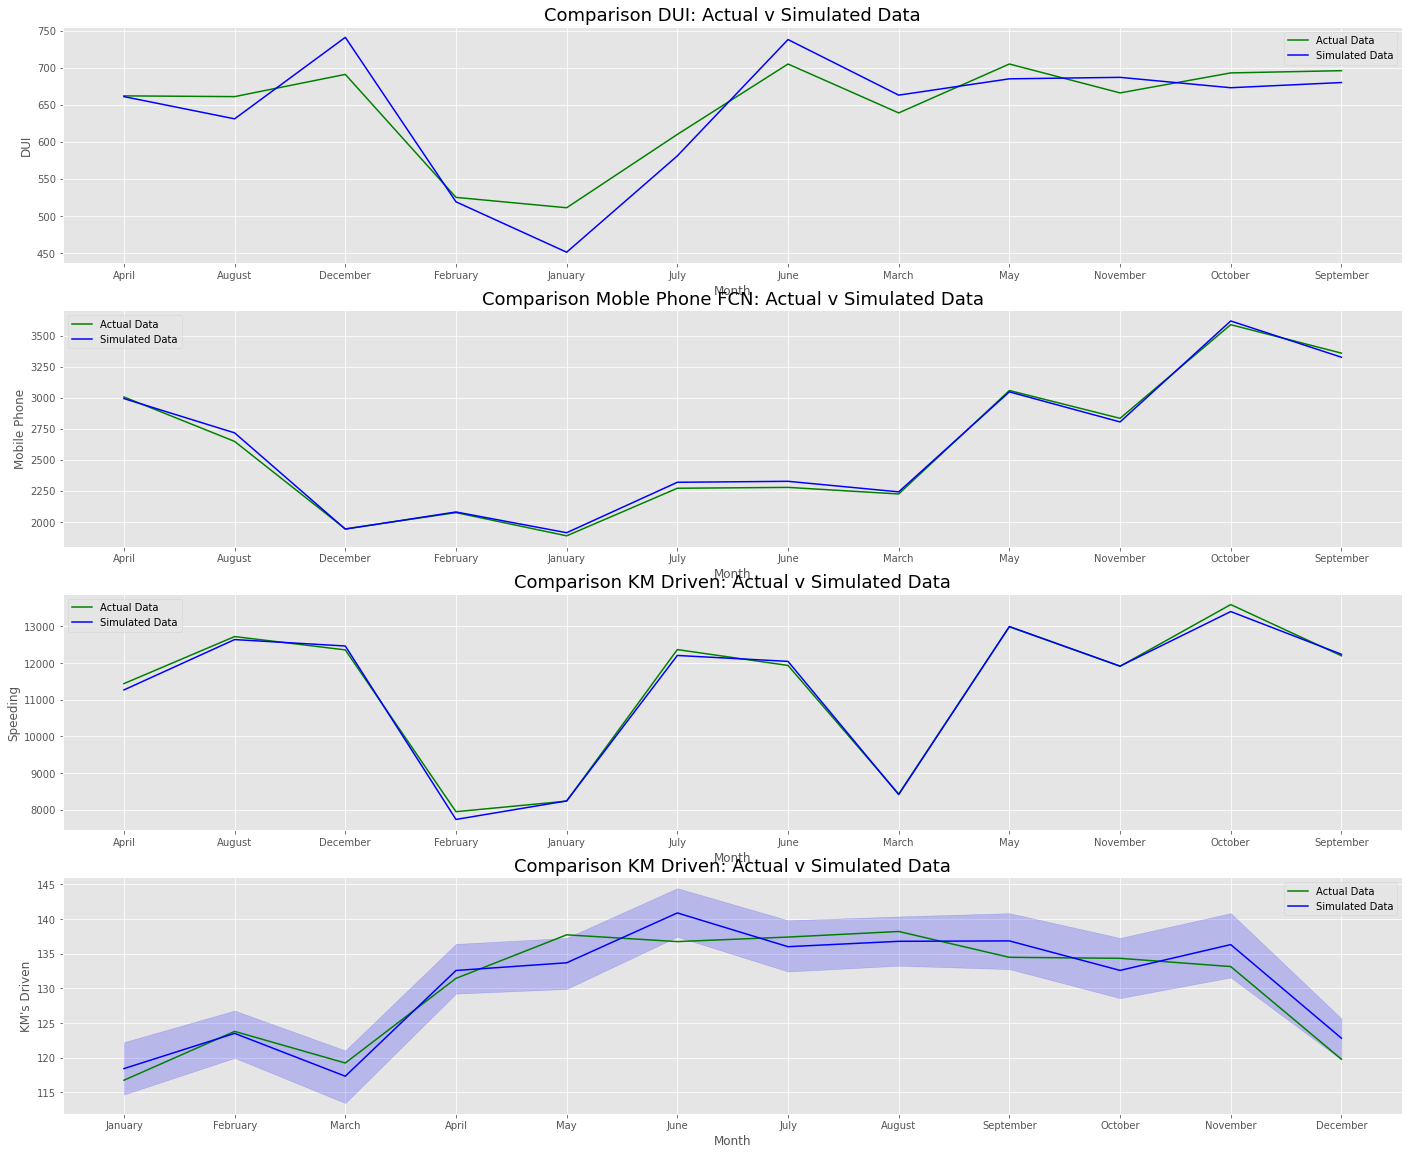

In [107]:

plt.subplot(4,1,1)
plt.title("Comparison DUI: Actual v Simulated Data",fontsize=18)
sns.lineplot(x='Month',y='Driving_Intoxicated',data=fcn_df,color='g',label='Actual Data',sort=True)
sns.lineplot(x='Month',y="DUI",data=dui_df,color='b',label='Simulated Data')

plt.subplot(4,1,2)
plt.title("Comparison Moble Phone FCN: Actual v Simulated Data",fontsize=18)
sns.lineplot(x='Month',y='Mobile_Phones',data=fcn_df,color='g',label='Actual Data',sort=True)
sns.lineplot(x='Month',y="Mobile Phone",data=mp_df,color='b',label='Simulated Data')

plt.subplot(4,1,3)
plt.title("Comparison KM Driven: Actual v Simulated Data",fontsize=18)
sns.lineplot(x='Month',y='Speeding',data=fcn_df,color='g',label='Actual Data',sort=True)
sns.lineplot(x='Month',y="Speeding",data=sp_df,color='b',label='Simulated Data')

plt.subplot(4,1,4)
plt.title("Comparison KM Driven: Actual v Simulated Data",fontsize=18)
sns.lineplot(x='Month',y='Average_KM_per_Mill_per_day',data=traffic_df,color='g',label='Actual Data',sort=False)
sns.lineplot(x='Month',y="KM's Driven",data=summary_df,color='b',label='Simulated Data',sort=False);

***

#### Correlations <a class="anchor" id="agg5"></a>

The original thinking was to see if there was any linear relationship between collsions and the various other data for Speeding, trafic etc. Creating a pairplot on our chosen variables we can quickly look for any linear relationships.  Observing the pairplot, it looks that the data looks very random. The R squared value is calculated for each set of variables we used for the pairplot. 

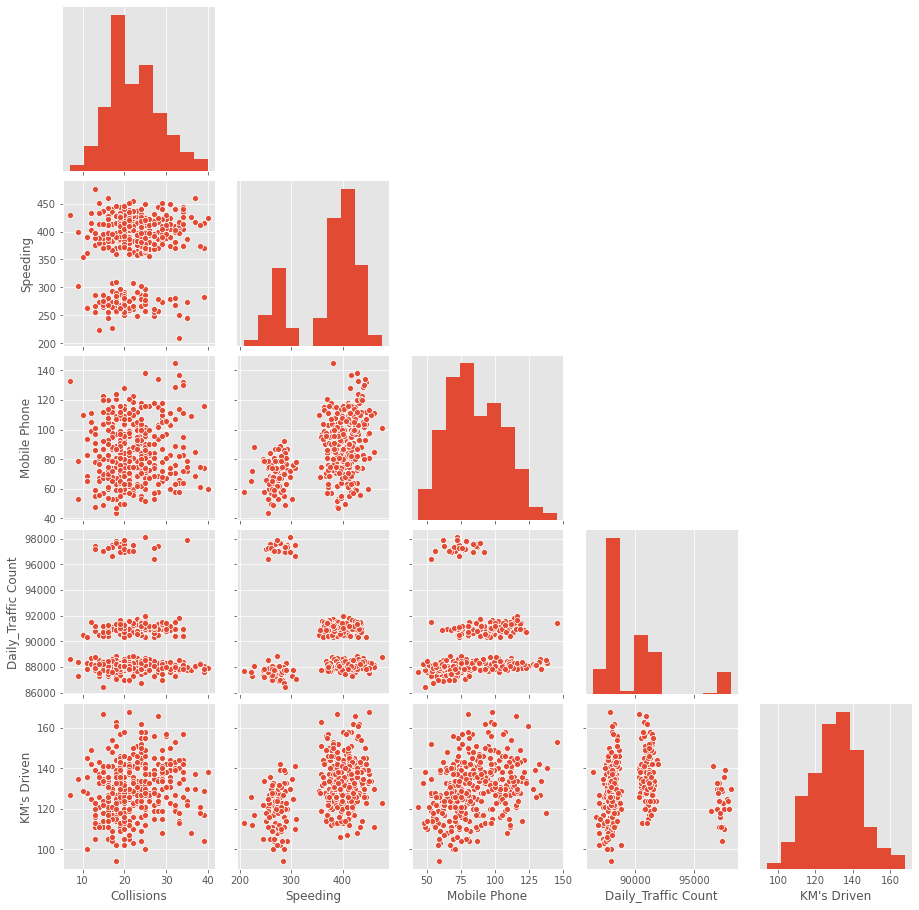

In [108]:
#ref https://seaborn.pydata.org/generated/seaborn.pairplot.html

#pairplot for collsions, speeding, mobile phone,traffic and km's driven
sns.pairplot(
    summary_df,
    x_vars=["Collisions","Speeding",'Mobile Phone','Daily_Traffic Count',"KM's Driven"],
    y_vars=["Collisions","Speeding",'Mobile Phone','Daily_Traffic Count',"KM's Driven"],corner=True
);

In [109]:
#ref https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python

#calculating r squared value for collsions:speeding
correlation_matrix = np.corrcoef(summary_df['Collisions'], summary_df['Speeding'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(" R Squared value for Collisions:Speeding: ",r_squared)

 R Squared value for Collisions:Speeding:  0.026215303913328464


In [110]:
#calculating r squared value for collsions:mobile phone
correlation_matrix = np.corrcoef(summary_df['Collisions'], summary_df['Mobile Phone'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(" R Squared value for Collisions:Mobile Phone: ",r_squared)

 R Squared value for Collisions:Mobile Phone:  0.003142930108775902


In [111]:
#calculating r squared value for collsions:dui
correlation_matrix = np.corrcoef(summary_df['Collisions'], summary_df['DUI'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(" R Squared value for Collisions:DUI: ",r_squared)

 R Squared value for Collisions:DUI:  0.0005877642302388007


In [112]:
#calculating r squared value for collsions:km's
correlation_matrix = np.corrcoef(summary_df['Collisions'], summary_df["KM's Driven"])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(" R Squared value for Collisions:KM Driven: ",r_squared)

 R Squared value for Collisions:KM Driven:  0.017319134995303204


Looking at these R squared values, there does not appear to have any strong linear relationships.

In [113]:
#simulated dataset
df

,Date,Day,Month,Collision Type,Gender,Age Band,Time_Band,Road User
0,2018-01-19,Friday,January,Serious,Male,25 - 34 years,06:00 - 09:00,All Car users
1,2018-01-11,Thursday,January,Serious,Female,6 - 9 years,03:00 - 06:00,Motor cyclists
2,2018-01-27,Saturday,January,Serious,Female,45 - 54 years,12:00 - 15:00,All Car users
3,2018-01-18,Thursday,January,Serious,Female,15 - 17 years,03:00 - 06:00,Other road users
4,2018-01-15,Monday,January,Serious,Female,45 - 54 years,12:00 - 15:00,All Car users
...,...,...,...,...,...,...,...,...
8145,2018-12-15,Saturday,December,Serious,Male,45 - 54 years,18:00 - 21:00,All Car users
8146,2018-12-06,Thursday,December,Serious,Male,15 - 17 years,12:00 - 15:00,Motor cyclists
8147,2018-12-07,Friday,December,Serious,Male,21 - 24 years,15:00 - 18:00,Pedal cyclists
8148,2018-12-10,Monday,December,Serious,Female,25 - 34 years,09:00 - 12:00,All Car users


In [114]:
#summary dataset based on simulated data
summary_df

,Date,Day,Month,Collisions,Fatals,Serious,DUI,Mobile Phone,Speeding,Daily_Traffic Count,KM's Driven
2018-01-01,2018-01-01,Monday,January,14,0.0,14,12,72,225,87303,112
2018-01-02,2018-01-02,Tuesday,January,19,1.0,18,15,55,269,87377,113
2018-01-03,2018-01-03,Wednesday,January,16,0.0,16,18,80,245,87290,105
2018-01-04,2018-01-04,Thursday,January,29,2.0,27,13,65,273,86956,108
2018-01-05,2018-01-05,Friday,January,16,0.0,16,17,60,278,87411,126
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,2018-12-27,Thursday,December,25,0.0,25,28,64,420,88540,128
2018-12-28,2018-12-28,Friday,December,38,0.0,38,33,61,411,88200,118
2018-12-29,2018-12-29,Saturday,December,20,1.0,19,26,63,416,88103,124
2018-12-30,2018-12-30,Sunday,December,14,1.0,13,28,56,434,88241,111


***

## References <a class="anchor" id="r1"></a>

1. RSA, Collision Statistics; https://www.rsa.ie/RSA/Road-Safety/RSA-Statistics/Collision-Statistics/Provisional-Reviews/

2. RSA, Collisons Factbooks; https://www.rsa.ie/en/RSA/Road-Safety/RSA-Statistics/Collision-Statistics/Road-Collision-Factbooks/

3. CSO, Transport Omnibus 2018; https://www.cso.ie/en/releasesandpublications/ep/p-tranom/transportomnibus2018/

4. CSO, Transport Omnibus 2017; https://www.cso.ie/en/releasesandpublications/ep/p-tranom/transportomnibus2017/

5. CSO, Transport Omnibus 2016; https://www.cso.ie/en/releasesandpublications/ep/p-tranom/transportomnibus2016/

6. CSO, Transport Omnibus 2015; https://www.cso.ie/en/releasesandpublications/ep/p-tranom/transportomnibus2015/

7. CSO, Transport Omnibus 2014; https://www.cso.ie/en/releasesandpublications/ep/p-tranom/transportomnibus2014/

8. An Garda Siochana, Statistics; https://www.garda.ie/en/roads-policing/statistics/previous-years-roads-policing-statistics/overview-2018.html

9. Medium.com, create sample dataset; https://medium.com/learn-with-akansha/creating-sample-dataset-using-numpy-2b78d4079b3c

10. Stackabuse, generting synthetic data with numpy; https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/

11. Python-course.eu, machibe learnig, create datasets; https://www.python-course.eu/machine_learning_create_datasets.php

12. Numpy, random.choice function; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

13. Numpy, random.binomial function; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

14. Numpy, random.poisson function; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson

15. Numpy, random.normal function; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

16. Investopedia, binomial distribution; https://www.investopedia.com/terms/b/binomialdistribution.asp

17. theanalysifactor.com; https://www.theanalysisfactor.com/differences-between-normal-and-poisson-distributions/

18. brilliant.org, poisson distribution; https://brilliant.org/wiki/poisson-distribution/

19. Keith Gailli, generating data; https://www.youtube.com/watch?v=VJBY2eVtf7o&t=1463s

### Python references

20. https://stackoverflow.com/questions/24618862/how-to-change-the-order-of-factor-plot-in-seaborn

21. https://stackoverflow.com/questions/52207358/create-dictionary-from-two-numpy-arrays

22. https://stackoverflow.com/questions/58195789/how-to-generate-random-dates-based-on-the-probability-of-the-days-in-python

23. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html

24. https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#bar-plot-of-column-values

25. https://seaborn.pydata.org/generated/seaborn.catplot.html

26. https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

27. https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

28. https://stackoverflow.com/questions/24984178/different-std-in-pandas-vs-numpy

29. https://seaborn.pydata.org/generated/seaborn.pairplot.html

30. https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python

31. https://stackoverflow.com/questions/16343752/numpy-where-function-multiple-conditions


## End
***